# Nota:
Recomendamos executar tudo de uma vez e de forma sequencial para evitar erros, visto que as algumas computações recorrem a outras feitas anteriormente

## Big Questions 
## ----------------------------------------------------------------------------------------------------------------------------------
## 1 - Número médio de compras em cada país - Customer
## 2 - Número médio de compras em cada região - Customer
## 3 - Número médio de vendas em cada país - Supplier
## 4 - Número médio de vendas em cada região - Supplier
## 5 - Número médio de vendas por mês
## 6 - Número médio de vendas por season
## 7 - Número médio de vendas em cada uns dos dias da semana
## 8 - Número médio de produtos vendidos por categoria
## 9 - Número médio de receitas alcançado por cada país
## 10 - Número médio de receitas alcançado por mês em cada região
## 11 - Intervalo de Confiança da media
## 12 - Melhor marca (marca mais vendida por mês)
## 13 - Melhor marca (marca mais vendida por estação)
## 14 - Melhor categoria (categoria mais vendida por mês)
## 15 - Melhor categoria (categoria mais vendida por estação)
## 16 - Pior marca (marca menos vendida por mês)
## 17 - Pior marca (marca menos vendida por estação)
## 18 - Pior categoria (categoria menos vendida por mês)
## 19 - Pior categoria (categoria menos vendida por estação)
## 20 - Variação do número de encomendas realizados por país 
## 21 - Variação do número de encomendas realizados por mês
## 22 - Variação do número de produtos comprados por páis
## 23 - Variação do número de produtos comprados por mês
## 24 - Clustering
## 25 - Regressão 1

In [1]:
#----------------
#Import libraries
#----------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#----------
#Ficheiros
#----------
filename_1998 = 'Datasets A3/1998.csv'
filename_1999 = 'Datasets A3/1999.csv'

#---------------------
#Colunas dos ficheiros
#---------------------
colums = ['p_name', 'p_brand', 'p_category','c_name','c_city','c_nation', 'c_region','s_name','s_city','s_nation','s_region','orderdate','dayofweek','month','year','daynuminweek','daynuminmonth','monthnuminyear','daynuminyear','weeknuminyear','sellingseason','lastdayinmonthfl','holidayfl','weekdayfl','l_orderpriority','l_shippriority','l_quantity','l_extendedprice','l_ordertotalprice','l_discount','l_supplycost','l_tax','l_shipmode','id']
#----------------
#Lêr os ficheiros
#----------------
dataframe98= pd.read_csv(filename_1998, names = colums, sep= ";", header = 0)
dataframe99= pd.read_csv(filename_1999, names = colums, sep= ";", header = 0)


dataframe98.loc[dataframe98["month"] =="January", 'month'] = 1
dataframe98.loc[dataframe98["month"] =="February", 'month'] = 2
dataframe98.loc[dataframe98["month"] =="March", 'month'] = 3
dataframe98.loc[dataframe98["month"] =="April", 'month'] = 4
dataframe98.loc[dataframe98["month"] =="May", 'month'] = 5
dataframe98.loc[dataframe98["month"] =="June", 'month'] = 6
dataframe98.loc[dataframe98["month"] =="July", 'month'] = 7
dataframe98.loc[dataframe98["month"] =="August", 'month'] = 8
dataframe98.loc[dataframe98["month"] =="September", 'month'] = 9
dataframe98.loc[dataframe98["month"] =="Octorber", 'month'] = 10
dataframe98.loc[dataframe98["month"] =="November", 'month'] = 11
dataframe98.loc[dataframe98["month"] =="December", 'month'] = 12
dataframe98.loc[dataframe98["c_nation"] =="SAUDI ARABIA", 'c_nation'] = "S.ARABIA"
dataframe98.loc[dataframe98["c_nation"] =="UNITED KINGDOM", 'c_nation'] = "UK"
dataframe98.loc[dataframe98["c_nation"] =="MOROCCO", 'c_nation'] = "MOROCO"
dataframe98.loc[dataframe98["c_nation"] =="MOZAMBIQUE", 'c_nation'] = "MOZAMBIK"

dataframe98.loc[dataframe98["s_nation"] =="SAUDI ARABIA", 'c_nation'] = "S.ARABIA"
dataframe98.loc[dataframe98["s_nation"] =="UNITED KINGDOM", 'c_nation'] = "UK"
dataframe98.loc[dataframe98["s_nation"] =="MOROCCO", 'c_nation'] = "MOROCO"
dataframe98.loc[dataframe98["s_nation"] =="MOZAMBIQUE", 'c_nation'] = "MOZAMBIK"

dataframe98.loc[dataframe98["weekdayfl"] =="VERDADEIRO", 'weekdayfl'] = 1
dataframe98.loc[dataframe98["weekdayfl"] =="FALSO", 'weekdayfl'] = 0

dataframe99.loc[dataframe99["month"] =="January", 'month'] = 1
dataframe99.loc[dataframe99["month"] =="February", 'month'] = 2
dataframe99.loc[dataframe99["month"] =="March", 'month'] = 3
dataframe99.loc[dataframe99["month"] =="April", 'month'] = 4
dataframe99.loc[dataframe99["month"] =="May", 'month'] = 5
dataframe99.loc[dataframe99["month"] =="June", 'month'] = 6
dataframe99.loc[dataframe99["month"] =="July", 'month'] = 7
dataframe99.loc[dataframe99["month"] =="August", 'month'] = 8
dataframe99.loc[dataframe99["month"] =="September", 'month'] = 9
dataframe99.loc[dataframe99["month"] =="Octorber", 'month'] = 10
dataframe99.loc[dataframe99["month"] =="November", 'month'] = 11
dataframe99.loc[dataframe99["month"] =="December", 'month'] = 12

dataframe99.loc[dataframe99["c_nation"] =="SAUDI ARABIA", 'c_nation'] = "S.ARABIA"
dataframe99.loc[dataframe99["c_nation"] =="UNITED KINGDOM", 'c_nation'] = "UK"
dataframe99.loc[dataframe99["c_nation"] =="MOROCCO", 'c_nation'] = "MOROCO"
dataframe99.loc[dataframe99["c_nation"] =="MOZAMBIQUE", 'c_nation'] = "MOZAMBIK"

dataframe99.loc[dataframe99["s_nation"] =="SAUDI ARABIA", 'c_nation'] = "S.ARABIA"
dataframe99.loc[dataframe99["s_nation"] =="UNITED KINGDOM", 'c_nation'] = "UK"
dataframe99.loc[dataframe99["s_nation"] =="MOROCCO", 'c_nation'] = "MOROCO"
dataframe99.loc[dataframe99["s_nation"] =="MOZAMBIQUE", 'c_nation'] = "MOZAMBIK"

dataframe = pd.concat([dataframe98,dataframe99])


## 1 - Número médio de compras em cada país - Customer

In [3]:
sales_c_nation98 = dataframe98[['c_nation','l_quantity']].groupby(['c_nation'])
sales_c_nation99 = dataframe99[['c_nation','l_quantity']].groupby(['c_nation'])

In [4]:
c_nations = []
medias_98 = []
medias_99 = []
mix_resultados6 = []
for i in sales_c_nation98:
    medias_98.append(i[1].l_quantity.mean())

for i in sales_c_nation99:
    medias_99.append(i[1].l_quantity.mean())
            
for i in dataframe98['c_nation']:
    if (i not in c_nations):
        c_nations.append(i)  
        
i=0
while(i < len(medias_98)):
    newValue = []
    newValue.append(medias_98[i])
    newValue.append(medias_99[i])
    mix_resultados6.append(newValue)
    i=i+1

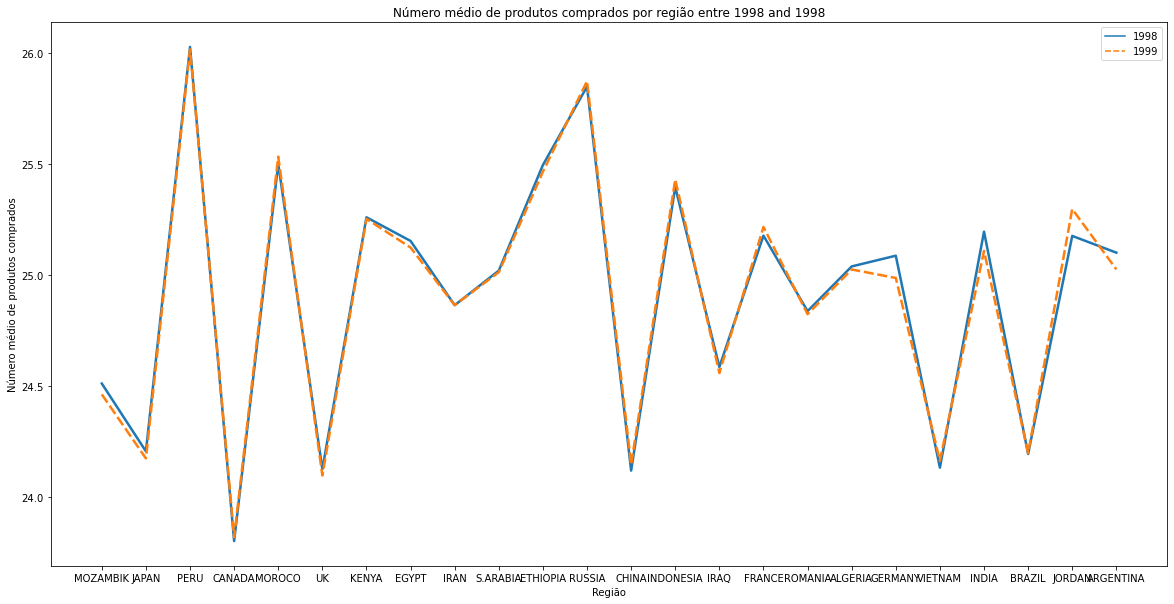

,1998,1999
count,24.000000,24.000000
mean,24.910836,24.903269
std,0.586520,0.589041
min,23.802102,23.819298
25%,24.435259,24.396482
50%,25.063042,25.019015
75%,25.211732,25.264097
max,26.027397,26.016416


In [5]:

data = pd.DataFrame(mix_resultados6, c_nations, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 10))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Região", ylabel='Número médio de produtos comprados')
lineplot.set_title('Número médio de produtos comprados por região entre 1998 and 1998')
plt.show() 
data.describe()

## 2 - Número médio de compras em cada região - Customer

In [6]:
sales_c_region98 = dataframe98[['c_region','l_quantity']].groupby(['c_region'])
sales_c_region99 = dataframe99[['c_region','l_quantity']].groupby(['c_region'])

In [7]:
c_regions = []
medias_98 = []
medias_99 = []
mix_resultados5 = []
for i in sales_c_region98:
    medias_98.append(i[1].l_quantity.mean())

for i in sales_c_region99:
    medias_99.append(i[1].l_quantity.mean())
            
for i in dataframe98['c_region']:
    if (i not in c_regions):
        c_regions.append(i)  
        
i=0
while(i < len(medias_98)):
    newValue = []
    newValue.append(medias_98[i])
    newValue.append(medias_99[i])
    mix_resultados5.append(newValue)
    i=i+1 

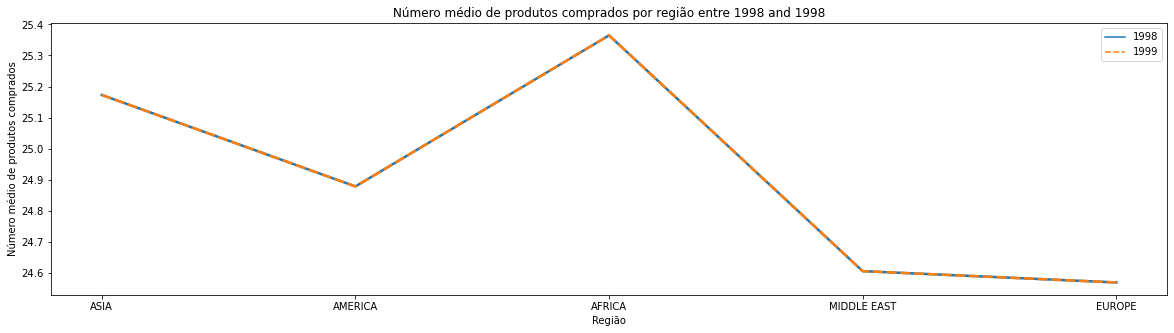

,1998,1999
count,5.000000,5.000000
mean,24.917837,24.917837
std,0.348663,0.348663
min,24.568582,24.568582
25%,24.604975,24.604975
50%,24.877978,24.877978
75%,25.172832,25.172832
max,25.364817,25.364817


In [8]:
data = pd.DataFrame(mix_resultados5, c_regions, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Região", ylabel='Número médio de produtos comprados')
lineplot.set_title('Número médio de produtos comprados por região entre 1998 and 1998')
plt.show() 
data.describe()

## 3 - Número médio de vendas em cada país - Supplier

In [9]:
sales_s_nation98 = dataframe98[['s_nation','l_quantity']].groupby(['s_nation'])
sales_s_nation99 = dataframe99[['s_nation','l_quantity']].groupby(['s_nation'])

In [10]:
s_nations = []
medias_98 = []
medias_99 = []
mix_resultados4 = []
for i in sales_s_nation98:
    medias_98.append(i[1].l_quantity.mean())

for i in sales_s_nation99:
    medias_99.append(i[1].l_quantity.mean())
            
for i in dataframe98['s_nation']:
    if (i not in s_nations):
        s_nations.append(i)  
        
i=0
while(i < len(medias_98)):
    newValue = []
    newValue.append(medias_98[i])
    newValue.append(medias_99[i])
    mix_resultados4.append(newValue)
    i=i+1

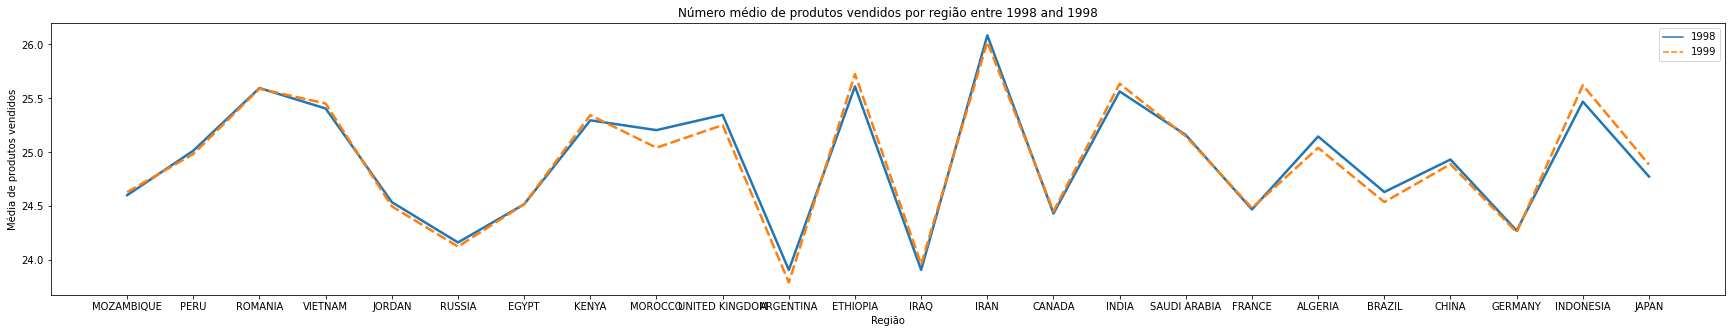

,1998,1999
count,24.000000,24.000000
mean,24.919455,24.912861
std,0.580516,0.597584
min,23.908962,23.793651
25%,24.506819,24.495316
50%,24.974391,24.937593
75%,25.361964,25.371716
max,26.084577,26.023622


In [11]:
data = pd.DataFrame(mix_resultados4, s_nations, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (30, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Região", ylabel='Média de produtos vendidos')
lineplot.set_title('Número médio de produtos vendidos por região entre 1998 and 1998')
plt.show() 
data.describe()

## 4 - Número médio de vendas em cada região - Supplier

In [12]:
sales_s_region98 = dataframe98[['s_region','l_quantity']].groupby(['s_region'])
sales_s_region99 = dataframe99[['s_region','l_quantity']].groupby(['s_region'])

In [13]:
s_regions = []
medias_98 = []
medias_99 = []
mix_resultados3 = []
for i in sales_s_region98:
    medias_98.append(i[1].l_quantity.mean())

for i in sales_s_region99:
    medias_99.append(i[1].l_quantity.mean())
            
for i in dataframe98['s_region']:
    if (i not in s_regions):
        s_regions.append(i)  
        
i=0
while(i < len(medias_98)):
    newValue = []
    newValue.append(medias_98[i])
    newValue.append(medias_99[i])
    mix_resultados3.append(newValue)
    i=i+1 

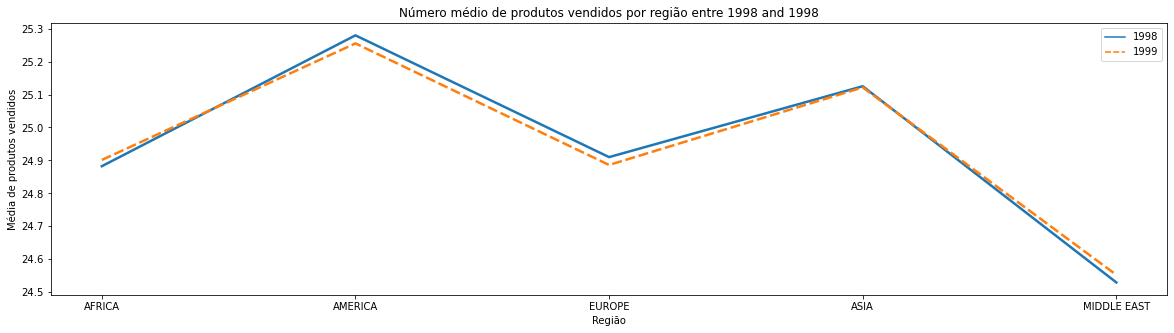

,1998,1999
count,5.000000,5.000000
mean,24.945373,24.943411
std,0.283877,0.267821
min,24.529475,24.552497
25%,24.882369,24.886186
50%,24.910033,24.901388
75%,25.125250,25.121671
max,25.279738,25.255311


In [14]:
data = pd.DataFrame(mix_resultados3, s_regions, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Região", ylabel='Média de produtos vendidos')
lineplot.set_title('Número médio de produtos vendidos por região entre 1998 and 1998')
plt.show() 
data.describe()

## 5 - Número médio de vendas por mês

In [15]:
sales_month98 = dataframe98[['month','l_quantity']].groupby(['month'])
sales_month99 = dataframe99[['month','l_quantity']].groupby(['month'])

In [16]:
nr_de_produtos_vendidos_mes98 = []
nr_de_produtos_vendidos_mes99 = []
meses = []
mix_resultados2 = []

for i in sales_month98:
    nr_de_produtos_vendidos_mes98.append(i[1].l_quantity.mean())

for i in sales_month99:
    nr_de_produtos_vendidos_mes99.append(i[1].l_quantity.mean())

for i in dataframe98['month']:
    if (i not in meses):
        meses.append(i)  

i=0
while(i < len(nr_de_produtos_vendidos_mes98)):
    newValue = []
    newValue.append(nr_de_produtos_vendidos_mes98[i])
    newValue.append(nr_de_produtos_vendidos_mes99[i])
    mix_resultados2.append(newValue)
    i=i+1           
        
        
#print(nr_de_produtos_vendidos_in_seasons98)
#print(nr_de_produtos_vendidos_in_seasons99)
#print(mix_resultados)

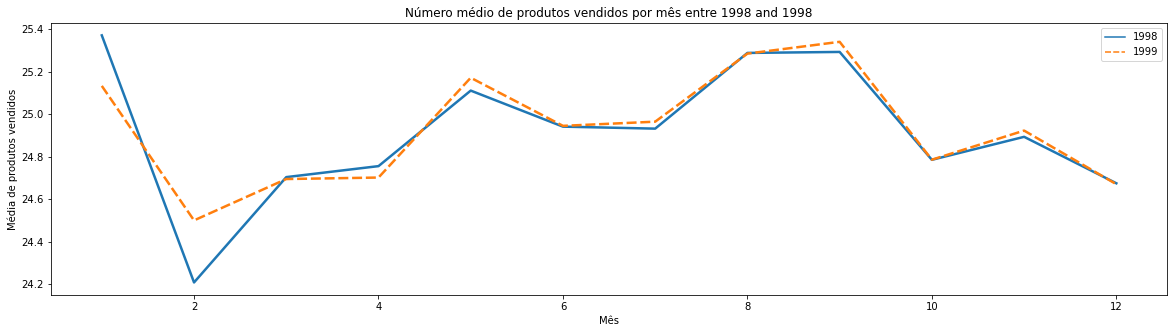

,1998,1999
count,12.000000,12.000000
mean,24.912825,24.926016
std,0.326586,0.265459
min,24.208106,24.500000
25%,24.742366,24.699831
50%,24.912405,24.933631
75%,25.154933,25.142291
max,25.370497,25.340078


In [17]:
data = pd.DataFrame(mix_resultados2, meses, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Mês", ylabel='Média de produtos vendidos')
lineplot.set_title('Número médio de produtos vendidos por mês entre 1998 and 1998')
plt.show() 
data.describe()

## 6 - Número médio de vendas por season

In [18]:
sales_season98 = dataframe98[['sellingseason','l_quantity']].groupby(['sellingseason'])
sales_season99 = dataframe99[['sellingseason','l_quantity']].groupby(['sellingseason'])

In [19]:
nr_de_produtos_vendidos_in_seasons98 = []
nr_de_produtos_vendidos_in_seasons99 = []
seasons = []
mix_resultados = []

for i in sales_season98:
    nr_de_produtos_vendidos_in_seasons98.append(i[1].l_quantity.mean())

for i in sales_season99:
    nr_de_produtos_vendidos_in_seasons99.append(i[1].l_quantity.mean())

for i in dataframe98['sellingseason']:
    if (i not in seasons):
        seasons.append(i)  

i=0
while(i < len(nr_de_produtos_vendidos_in_seasons98)):
    newValue = []
    newValue.append(nr_de_produtos_vendidos_in_seasons98[i])
    newValue.append(nr_de_produtos_vendidos_in_seasons99[i])
    mix_resultados.append(newValue)
    i=i+1           
        
        
#print(nr_de_produtos_vendidos_in_seasons98)
#print(nr_de_produtos_vendidos_in_seasons99)
#print(mix_resultados)

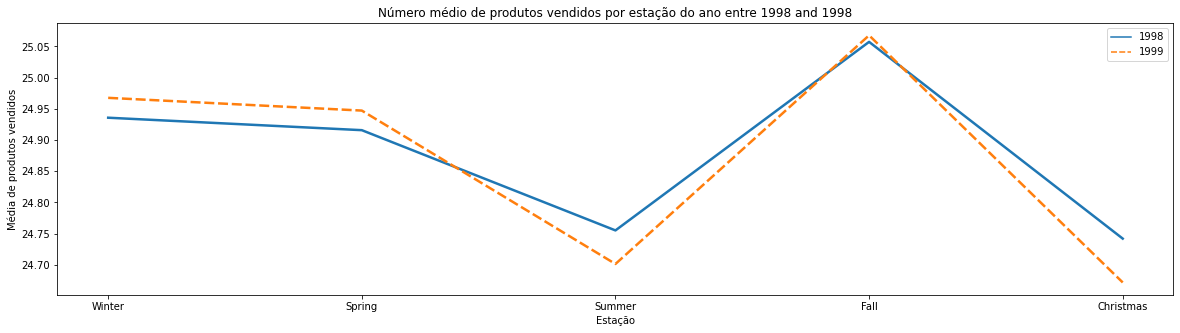

,1998,1999
count,5.000000,5.000000
mean,24.881221,24.871164
std,0.132570,0.174687
min,24.742181,24.672000
25%,24.755294,24.701575
50%,24.915781,24.947140
75%,24.935717,24.967532
max,25.057133,25.067572


In [20]:
data = pd.DataFrame(mix_resultados, seasons, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Estação", ylabel='Média de produtos vendidos')
lineplot.set_title('Número médio de produtos vendidos por estação do ano entre 1998 and 1998')
plt.show() 
data.describe()

## 7 - Número médio de vendas em cada uns dos dias da semana

In [21]:
sales_semana98 = dataframe98[['daynuminweek','l_quantity']].groupby(['daynuminweek'])
sales_semana99 = dataframe99[['daynuminweek','l_quantity']].groupby(['daynuminweek'])

In [22]:
nr_de_produtos_vendidos_in_week98 = []
nr_de_produtos_vendidos_in_week99 = []
day_in_week = [1,2,3,4,5,6,7]
resultado = []

for i in sales_semana98:
    nr_de_produtos_vendidos_in_week98.append(i[1].l_quantity.mean())

for i in sales_semana99:
    nr_de_produtos_vendidos_in_week99.append(i[1].l_quantity.mean())

i=0
while(i < len(nr_de_produtos_vendidos_in_week98)):
    newValue = []
    newValue.append(nr_de_produtos_vendidos_in_week98[i])
    newValue.append(nr_de_produtos_vendidos_in_week99[i])
    resultado.append(newValue)
    i=i+1    
    
#print(resultado)   
#print(nr_de_produtos_vendidos_in_week98)
#print(nr_de_produtos_vendidos_in_week99)
#print(len(nr_de_produtos_vendidos_in_week98))
#print(len(nr_de_produtos_vendidos_in_week99))
#print(len(resultado))

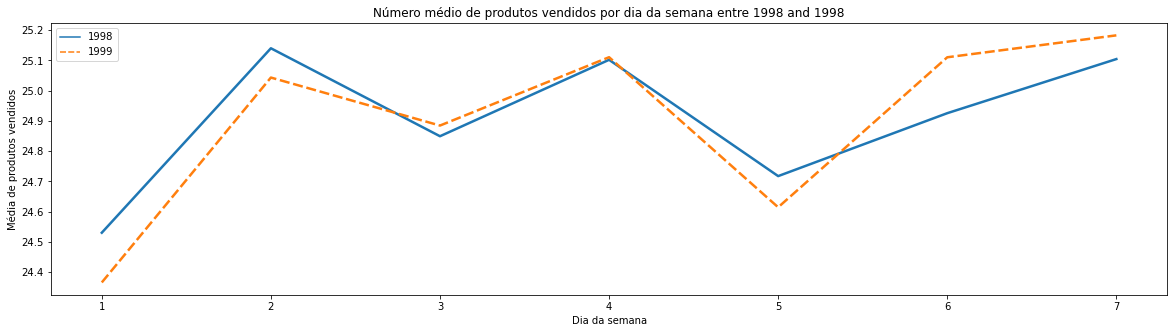

,1998,1999
count,7.000000,7.000000
mean,24.909833,24.901670
std,0.228462,0.304645
min,24.530011,24.365509
25%,24.783279,24.749385
50%,24.925476,25.043360
75%,25.103275,25.110547
max,25.140234,25.182958


In [23]:
data = pd.DataFrame(resultado, day_in_week, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Dia da semana", ylabel='Média de produtos vendidos')
lineplot.set_title('Número médio de produtos vendidos por dia da semana entre 1998 and 1998')
plt.show() 
data.describe()

## 8 - Número médio de produtos vendidos por categoria

In [24]:
sales_p_brand98 = dataframe98[['p_category','l_quantity']].groupby(['p_category'])
sales_p_brand99 = dataframe99[['p_category','l_quantity']].groupby(['p_category'])

In [25]:
resultado98 = []
resultado99 = []
nr_de_produtos_vendidos_p_brand98 = []
nr_de_produtos_vendidos_p_brand99 = []
nr_de_encomendas_p_brand98 = []
nr_de_encomendas_p_brand99 = []
media_produtos_p_brand98 = []
media_produtos_p_brand99 = []
dataset_mix = []
categories = []

for i in sales_p_brand98:
    nr_de_produtos_vendidos_p_brand98.append(i[1].sum().l_quantity)
    nr_de_encomendas_p_brand98.append(len(i[1]))
    
for i in sales_p_brand99:
    nr_de_produtos_vendidos_p_brand99.append(i[1].sum().l_quantity)
    nr_de_encomendas_p_brand99.append(len(i[1]))    
    
    
i=0
while(i < len(nr_de_produtos_vendidos_p_brand98)):
    newValue = []
    newValue.append(nr_de_produtos_vendidos_p_brand98[i])
    newValue.append(nr_de_encomendas_p_brand98[i])
    resultado98.append(newValue)
    i=i+1
          
i=0
while(i < len(nr_de_produtos_vendidos_p_brand99)):
    newValue = []
    newValue.append(nr_de_produtos_vendidos_p_brand99[i])
    newValue.append(nr_de_encomendas_p_brand99[i])
    resultado99.append(newValue)
    i=i+1
           
for i in resultado98:
    media_produtos_p_brand98.append(i[0] / i[1])

for i in resultado99:
    media_produtos_p_brand99.append(i[0] / i[1])

#Mixing data
j=0
for i in media_produtos_p_brand98:
    newBrand = []
    newBrand.append(i)
    newBrand.append(media_produtos_p_brand99[j])
    dataset_mix.append(newBrand)
    j = j + 1

    
for i in dataframe98['p_category']:
    if (i not in categories):
        categories.append(i)      
    
    
#print(dataset_mix)
#print(media_produtos_p_brand98)
#print(media_produtos_p_brand99)
#print(len(media_produtos_p_brand98))
#print(len(media_produtos_p_brand99))
#print(len(dataset_mix))

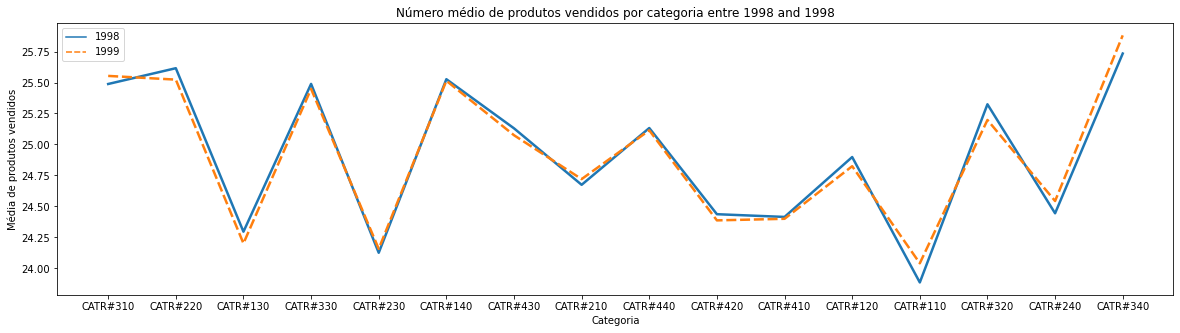

,1998,1999
count,16.000000,16.000000
mean,24.913572,24.911319
std,0.593263,0.581675
min,23.885993,24.040752
25%,24.431442,24.396638
50%,25.014356,24.949557
75%,25.488381,25.464813
max,25.734032,25.880859


In [26]:
data = pd.DataFrame(dataset_mix, categories, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 5))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Categoria", ylabel='Média de produtos vendidos')
lineplot.set_title('Número médio de produtos vendidos por categoria entre 1998 and 1998')
plt.show() 
data.describe()

In [27]:
#data.describe()
#print(data.describe()['1998']['mean'])

## 9 - Número médio de receitas alcançado por cada país

In [28]:
sales_total_price_s_nation98 = dataframe98[['s_nation','l_ordertotalprice']].groupby(['s_nation'])
sales_total_price_s_nation99 = dataframe99[['s_nation','l_ordertotalprice']].groupby(['s_nation'])

In [107]:
receitas_por_pais98 = []
receitas_por_pais99 = []
result_mixingxd = []

for i in sales_total_price_s_nation98:
    receitas_por_pais98.append(i[1].l_ordertotalprice.sum())

for i in sales_total_price_s_nation99:
    receitas_por_pais99.append(i[1].l_ordertotalprice.sum())


#print(s_nations)
#print(receitas_por_pais98)
#print(receitas_por_pais99)
#print(len(receitas_por_pais98))
#print(len(receitas_por_pais99))

res = st.t.interval(alpha = 0.95, df=len(receitas_por_pais98)-1, loc=np.mean(receitas_por_pais98), scale=st.sem( receitas_por_pais98))
print("Intervalo de Confiança 1998: ", res)
res2 = st.t.interval(alpha = 0.95, df=len(receitas_por_pais99)-1, loc=np.mean(receitas_por_pais99), scale=st.sem( receitas_por_pais99))
print("Intervalo de Confiança 1999: ", res2)

Intervalo de Confiança 1998:  (9552802742.911129, 10550418733.922203)
Intervalo de Confiança 1999:  (9542660524.43424, 10560560952.399092)


Text(0, 0.5, 'Número médio de receitas')

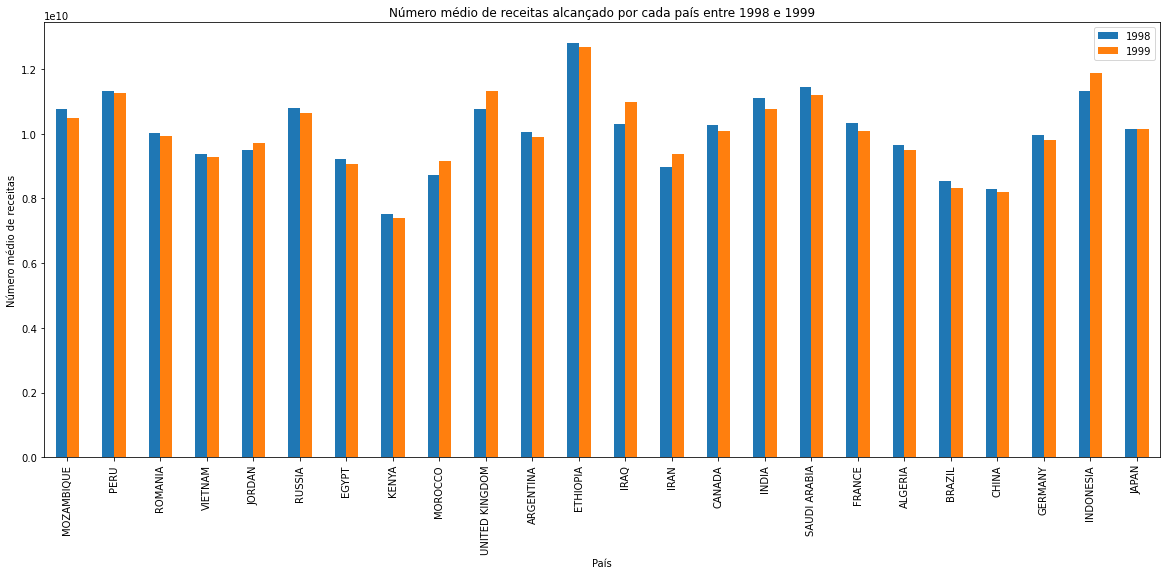

In [30]:
plotdata = pd.DataFrame({"1998": receitas_por_pais98, "1999": receitas_por_pais99}, index=s_nations)
plotdata.plot(kind="bar",figsize=(20,8))
plt.title("Número médio de receitas alcançado por cada país entre 1998 e 1999")
plt.xlabel("País")
plt.ylabel("Número médio de receitas")

## 10 - Número médio de receitas alcançado por mês em cada região

In [31]:
sales_total_price_s_region_month98 = dataframe98[['month','s_region','l_ordertotalprice']].groupby(['month','s_region'])
sales_total_price_s_region_month99 = dataframe99[['month','s_region','l_ordertotalprice']].groupby(['month','s_region'])

In [32]:
receitas_por_regiao_98 = []
receitas_por_regiao_99 = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
res_africa99 = []
res_america99= []
res_europe99= []
res_asia99= []
res_middle_east99= []
res_africa98 = []
res_america98= []
res_europe98= []
res_asia98= []
res_middle_east98= []

for i in sales_total_price_s_region_month98:
    #print(i[1])
    receitas_por_regiao_98.append(i[1].l_ordertotalprice.mean()) #os 5 primeiros valores são de janeiro, os outros 5 de fevereiro

for i in sales_total_price_s_region_month99:
    #print(i[1])
    receitas_por_regiao_99.append(i[1].l_ordertotalprice.mean()) #os 5 primeiros valores são de janeiro, os outros 5 de fevereiro
    

x = 0
for i in receitas_por_regiao_98:
    if(x == 5):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append(i)
        x = x+1
    else:
        res_aux98.append(i)
        x = x+1
results98.append(res_aux98)



x = 0
for i in receitas_por_regiao_99:
    if(x == 5):
        x=0
        results99.append(res_aux99)
        res_aux99 = []
        res_aux99.append(i)
        x = x+1
    else:
        res_aux99.append(i)
        x = x+1
results99.append(res_aux99)




for i in results98:
    res_africa98.append(i[0])
    res_america98.append(i[1])
    res_europe98.append(i[2])
    res_asia98.append(i[3])
    res_middle_east98.append(i[4])
    
for i in results99:
    res_africa99.append(i[0])
    res_america99.append(i[1])
    res_europe99.append(i[2])
    res_asia99.append(i[3])
    res_middle_east99.append(i[4])
    
#print(receitas_por_regiao_98)
#print(len(receitas_por_regiao_98))
#print(results98)
#print(s_regions)
#print(res_africa)

,Middle East 1998,Middle East 1999
count,1.200000e+01,1.200000e+01
mean,1.457100e+07,1.459565e+07
std,5.276455e+05,4.004599e+05
min,1.361271e+07,1.401134e+07
25%,1.433387e+07,1.435016e+07
50%,1.466327e+07,1.462927e+07
75%,1.500153e+07,1.484556e+07
max,1.517409e+07,1.517292e+07


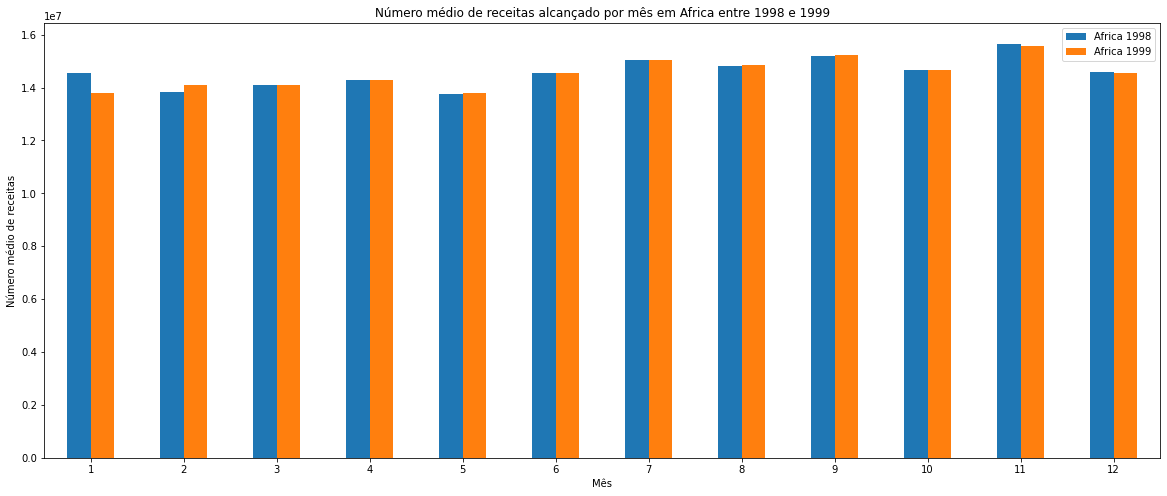

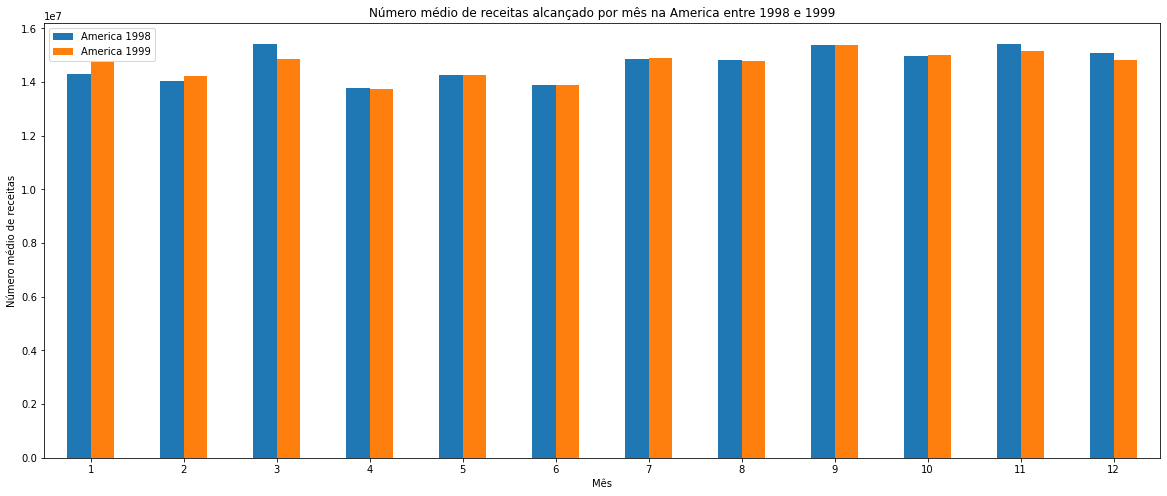

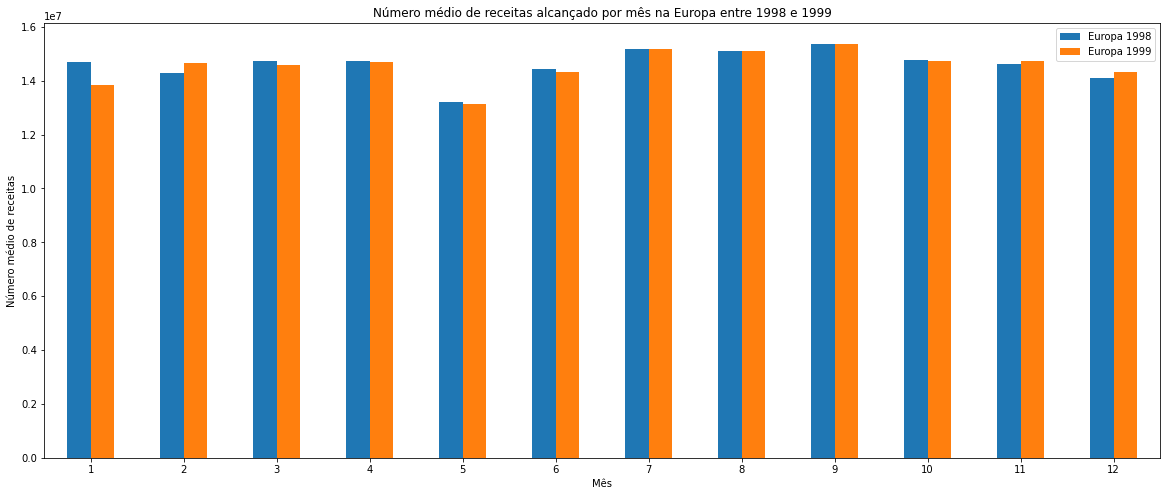

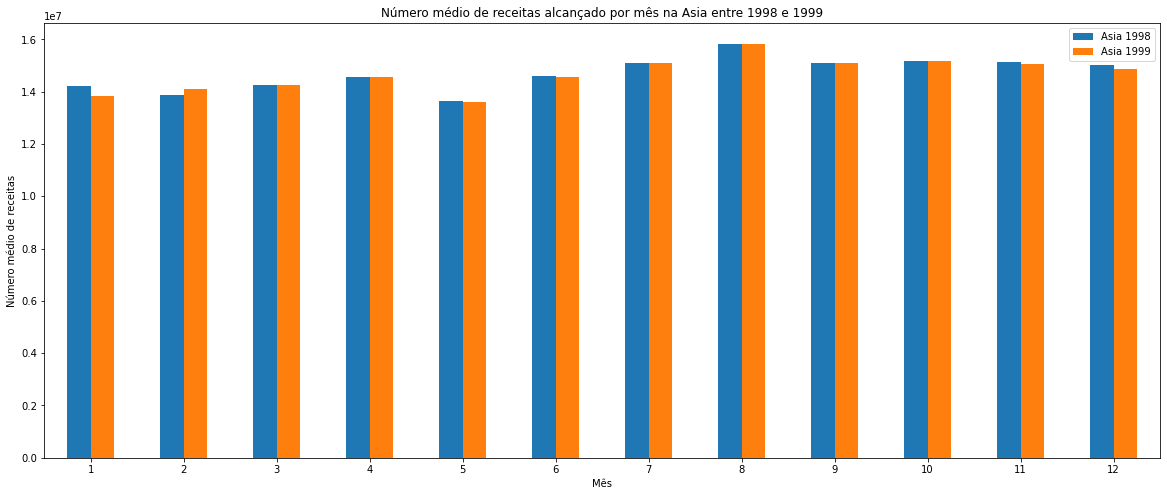

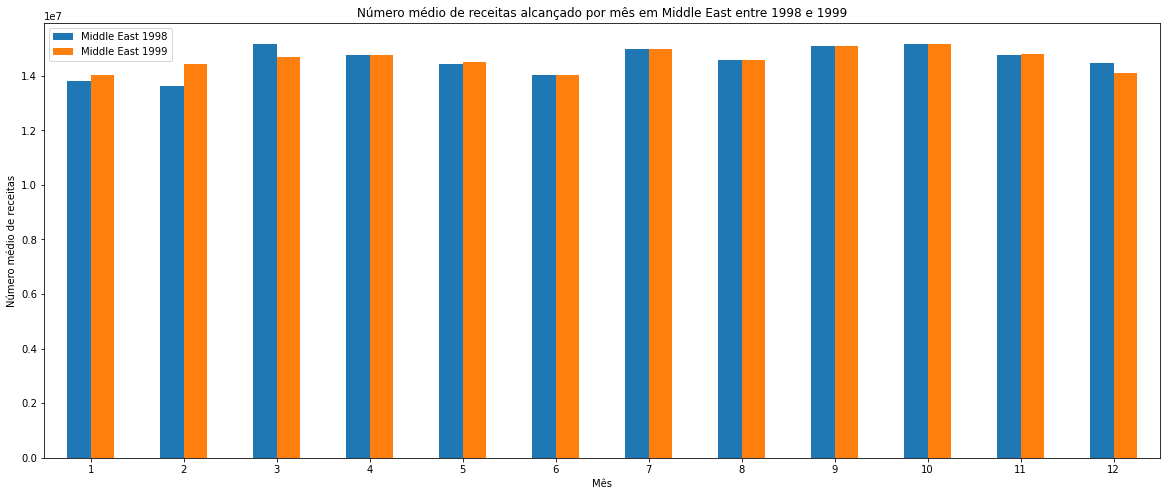

In [33]:
meses.sort()
plotdata = pd.DataFrame({"Africa 1998": res_africa98, "Africa 1999": res_africa99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Número médio de receitas alcançado por mês em Africa entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número médio de receitas")
plotdata.describe()

plotdata = pd.DataFrame({"America 1998": res_america98, "America 1999": res_america99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Número médio de receitas alcançado por mês na America entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número médio de receitas")
plotdata.describe()

plotdata = pd.DataFrame({"Europa 1998": res_europe98, "Europa 1999": res_europe99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Número médio de receitas alcançado por mês na Europa entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número médio de receitas")
plotdata.describe()

plotdata = pd.DataFrame({"Asia 1998": res_asia98, "Asia 1999": res_asia99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Número médio de receitas alcançado por mês na Asia entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número médio de receitas")
plotdata.describe()

plotdata = pd.DataFrame({"Middle East 1998": res_middle_east98, "Middle East 1999": res_middle_east99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Número médio de receitas alcançado por mês em Middle East entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número médio de receitas")
plotdata.describe()

## 11 - Intervalo de Confiança da media

In [34]:
alfa = 0.95
data_sales_p_category = pd.DataFrame(dataset_mix, categories, columns=["1998", "1999"])
data_sales_daynrinweek = pd.DataFrame(resultado, day_in_week, columns=["1998", "1999"])
data_sales_season = pd.DataFrame(mix_resultados, seasons, columns=["1998", "1999"])
data_sales_month = pd.DataFrame(mix_resultados2, meses, columns=["1998", "1999"])
data_sales_s_region = pd.DataFrame(mix_resultados3, s_regions, columns=["1998", "1999"])
data_sales_s_nation = pd.DataFrame(mix_resultados4, s_nations, columns=["1998", "1999"])
data_sales_c_region = pd.DataFrame(mix_resultados5, c_regions, columns=["1998", "1999"])
data_sales_c_nation = pd.DataFrame(mix_resultados6, c_nations, columns=["1998", "1999"])

In [35]:
res = st.t.interval(alpha = alfa, df=len(data_sales_p_category)-1, loc=np.mean(data_sales_p_category), scale=st.sem(data_sales_p_category))
print("Intervalo de confiança da média das vendas por categoria: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das vendas por categoria: 
 1998: [24.5974447  24.60136652] 
 1999: [25.22969957 25.22127169]


In [36]:
res = st.t.interval(alpha = alfa, df=len(data_sales_daynrinweek)-1, loc=np.mean(data_sales_daynrinweek), scale=st.sem(data_sales_daynrinweek))
print("Intervalo de confiança da média das vendas nos dias da semana: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das vendas nos dias da semana: 
 1998: [24.69854022 24.61992092] 
 1999: [25.12112496 25.18341957]


In [37]:
res = st.t.interval(alpha = alfa, df=len(data_sales_season)-1, loc=np.mean(data_sales_season), scale=st.sem(data_sales_season))
print("Intervalo de confiança da média das vendas por estação do ano: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das vendas por estação do ano: 
 1998: [24.71661417 24.65426133] 
 1999: [25.04582833 25.08806646]


In [38]:
res = st.t.interval(alpha = alfa, df=len(data_sales_month)-1, loc=np.mean(data_sales_month), scale=st.sem(data_sales_month))
print("Intervalo de confiança da média das vendas por mês: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das vendas por mês: 
 1998: [24.70532194 24.75735171] 
 1999: [25.12032814 25.09468077]


In [39]:
res = st.t.interval(alpha = alfa, df=len(data_sales_s_region)-1, loc=np.mean(data_sales_s_region), scale=st.sem(data_sales_s_region))
print("Intervalo de confiança da média das vendas por região: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das vendas por região: 
 1998: [24.5928928  24.61086655] 
 1999: [25.29785312 25.27595461]


In [40]:
res = st.t.interval(alpha = alfa, df=len(data_sales_s_nation)-1, loc=np.mean(data_sales_s_nation), scale=st.sem(data_sales_s_nation))
print("Intervalo de confiança da média das vendas por país: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das vendas por país: 
 1998: [24.6743241  24.66052284] 
 1999: [25.16458493 25.16519837]


In [41]:
res = st.t.interval(alpha = alfa, df=len(data_sales_c_region)-1, loc=np.mean(data_sales_c_region), scale=st.sem(data_sales_c_region))
print("Intervalo de confiança da média das compras por região: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das compras por região: 
 1998: [24.48491437 24.48491437] 
 1999: [25.3507595 25.3507595]


In [42]:
res = st.t.interval(alpha = alfa, df=len(data_sales_c_nation)-1, loc=np.mean(data_sales_c_nation), scale=st.sem(data_sales_c_nation))
print("Intervalo de confiança da média das compras por país: \n 1998:", res[0], "\n 1999:" , res[1])

Intervalo de confiança da média das compras por país: 
 1998: [24.66317044 24.65453857] 
 1999: [25.15850181 25.1519988 ]


## 12 - Melhor marca (marca mais vendida por mês)

In [43]:
sales_total_price_p_brand_month98 = dataframe98[['month','p_brand','l_quantity']].groupby(['month','p_brand'])
sales_total_price_p_brand_month99 = dataframe99[['month','p_brand','l_quantity']].groupby(['month','p_brand'])

In [44]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_brand = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_brands98 = []
top_brands99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_brand']:
    if (i not in p_brand):
        p_brand.append(i)  
        
for i in sales_total_price_p_brand_month98:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_price_p_brand_month99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 


x = 0
for i in total_sales_98:
    if(x == 64):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 64):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales98.append(i[0][0])
    top_brands98.append(i[0][1])
    
for i in results99:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales99.append(i[0][0])
    top_brands99.append(i[0][1])            


,1998,1999
count,12.000000,12.000000
mean,887.666667,794.833333
std,180.742073,37.527767
min,741.000000,784.000000
25%,806.500000,784.000000
50%,835.500000,784.000000
75%,877.500000,784.000000
max,1414.000000,914.000000


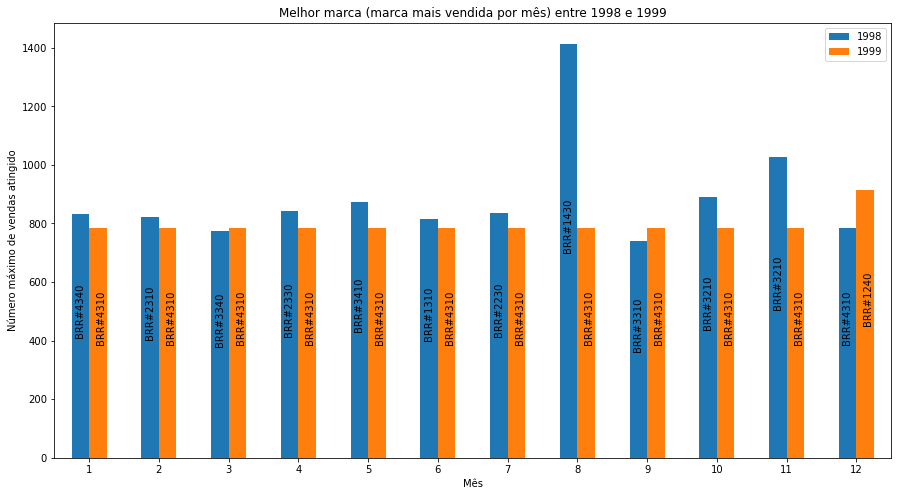

In [45]:
meses.sort()
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = meses)
plotdata.plot(kind="bar",figsize=(15,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Melhor marca (marca mais vendida por mês) entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número máximo de vendas atingido")

x=0
for i in top_brands98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_brands98[x],rotation=90)
    x = x + 1

x=0   
for i in top_brands99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_brands99[x],rotation=90)  
    x = x + 1

   
plotdata.describe()

## 13 - Melhor marca (marca mais vendida por estação)

In [46]:
sales_total_price_p_brand_sellingseason98 = dataframe98[['sellingseason','p_brand','l_quantity']].groupby(['sellingseason','p_brand'])
sales_total_price_p_brand_sellingseason99 = dataframe99[['sellingseason','p_brand','l_quantity']].groupby(['sellingseason','p_brand'])

In [47]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_brand = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_brands98 = []
top_brands99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_brand']:
    if (i not in p_brand):
        p_brand.append(i)  
        
for i in sales_total_price_p_brand_sellingseason98:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_price_p_brand_sellingseason99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês


x = 0
for i in total_sales_98:
    if(x == 64):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 64):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales98.append(i[0][0])
    top_brands98.append(i[0][1])
    
for i in results99:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales99.append(i[0][0])
    top_brands99.append(i[0][1])            
            

,1998,1999
count,5.000000,5.000000
mean,1766.800000,2212.800000
std,817.458684,605.527208
min,842.000000,1942.000000
25%,1455.000000,1942.000000
50%,1547.000000,1942.000000
75%,1942.000000,1942.000000
max,3048.000000,3296.000000


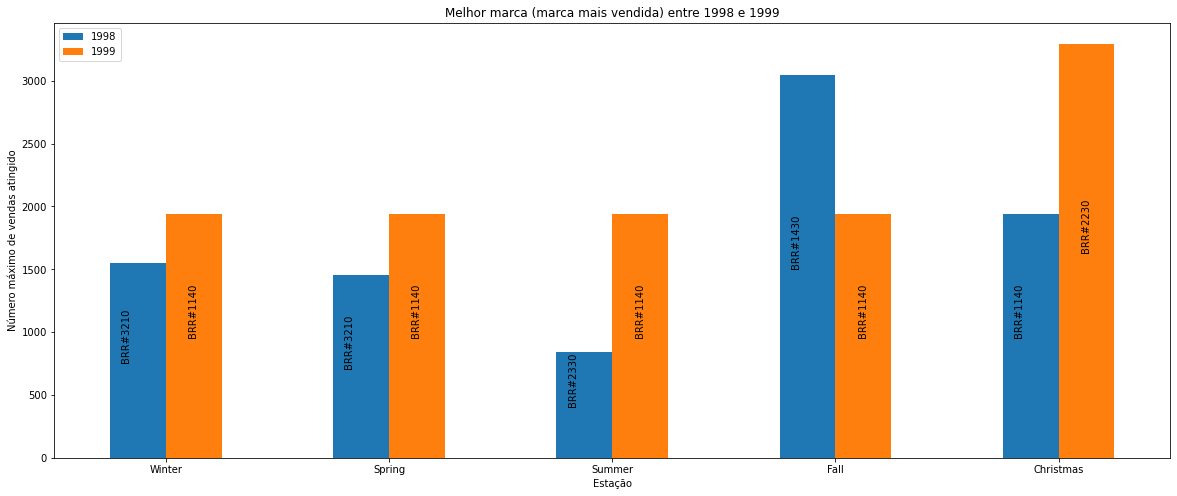

In [48]:
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = seasons)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Melhor marca (marca mais vendida) entre 1998 e 1999")
plt.xlabel("Estação")
plt.ylabel("Número máximo de vendas atingido")

x=0
for i in top_brands98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_brands98[x],rotation=90)
    x = x + 1

x=0   
for i in top_brands99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_brands99[x],rotation=90)  
    x = x + 1
   
plotdata.describe()

## 14 - Melhor categoria (categoria mais vendida por mês)

In [49]:
sales_total_price_p_category_month98 = dataframe98[['month','p_category','l_quantity']].groupby(['month','p_category'])
sales_total_price_p_category_month99 = dataframe99[['month','p_category','l_quantity']].groupby(['month','p_category'])

In [50]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_category = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_categories98 = []
top_categories99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_category']:
    if (i not in p_category):
        p_category.append(i)  
        
for i in sales_total_price_p_category_month98:
    #print(i[1])
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_price_p_category_month99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 



x = 0
for i in total_sales_98:
    if(x == 16):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 16):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales98.append(i[0][0])
    top_categories98.append(i[0][1])
    
for i in results99:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales99.append(i[0][0])
    top_categories99.append(i[0][1])            


,1998,1999
count,12.00000,12.000000
mean,2666.00000,2419.833333
std,465.06676,103.345698
min,1950.00000,2390.000000
25%,2388.50000,2390.000000
50%,2596.00000,2390.000000
75%,2800.50000,2390.000000
max,3601.00000,2748.000000


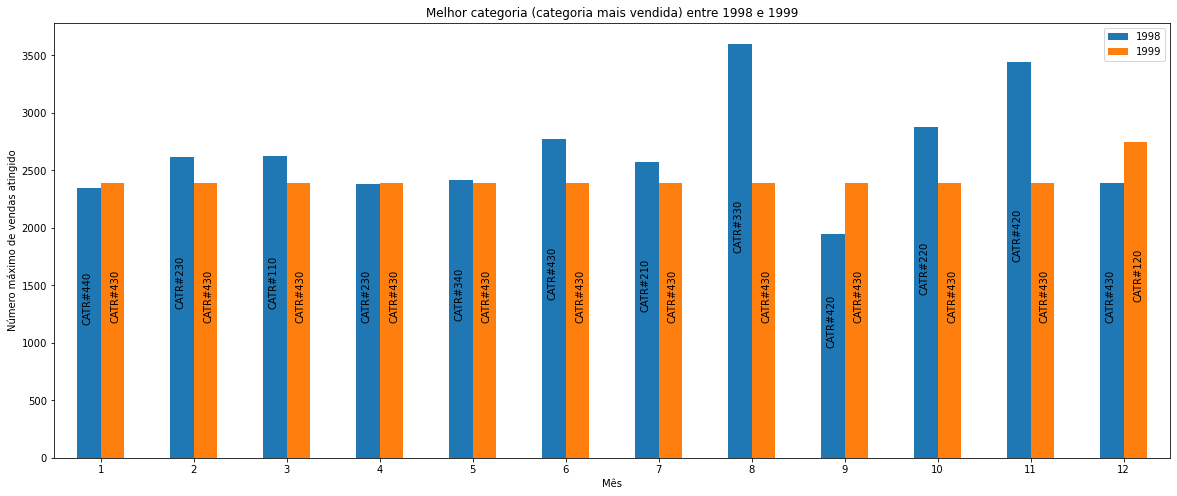

In [51]:
meses.sort()
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Melhor categoria (categoria mais vendida) entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número máximo de vendas atingido")

x=0
for i in top_categories98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_categories98[x],rotation=90)
    x = x + 1

x=0   
for i in top_categories99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_categories99[x],rotation=90)  
    x = x + 1
   
plotdata.describe()

## 15 - Melhor categoria (categoria mais vendida por estação)

In [52]:
sales_total_price_p_category_sellingseason98 = dataframe98[['sellingseason','p_category','l_quantity']].groupby(['sellingseason','p_category'])
sales_total_price_p_category_sellingseason99 = dataframe99[['sellingseason','p_category','l_quantity']].groupby(['sellingseason','p_category'])

In [53]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_category = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_categories98 = []
top_categories99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_category']:
    if (i not in p_category):
        p_category.append(i)  
        
for i in sales_total_price_p_category_sellingseason98:
    #print(i[1])
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_price_p_category_sellingseason99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 



x = 0
for i in total_sales_98:
    if(x == 16):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 16):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales98.append(i[0][0])
    top_categories98.append(i[0][1])
    
for i in results99:
    i.sort(key=lambda x:x[0],reverse=True)
    top1_sales99.append(i[0][0])
    top_categories99.append(i[0][1])            



,1998,1999
count,5.000000,5.000000
mean,5866.000000,6901.000000
std,2891.656273,214.662526
min,2384.000000,6805.000000
25%,4511.000000,6805.000000
50%,5469.000000,6805.000000
75%,6805.000000,6805.000000
max,10161.000000,7285.000000


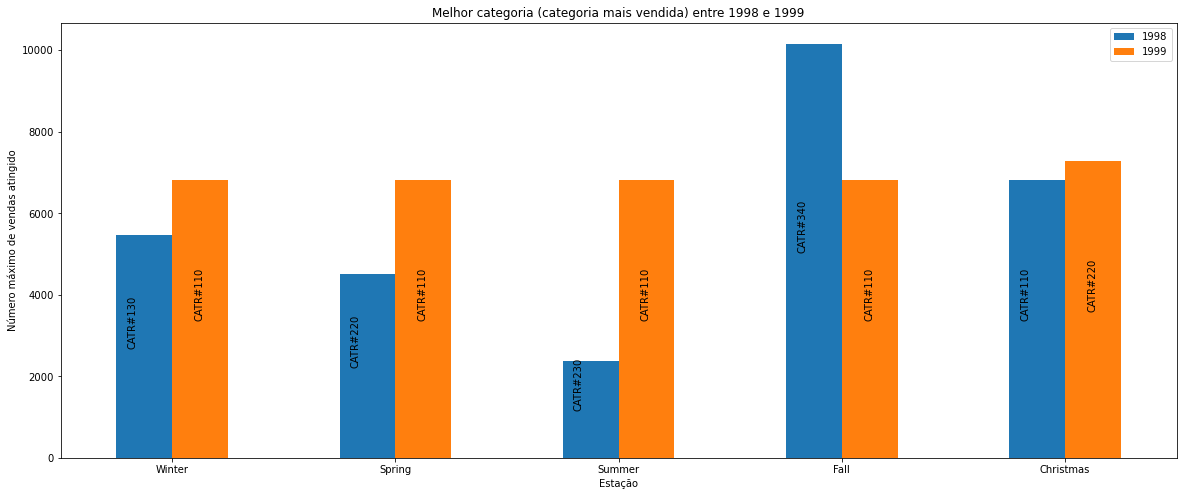

In [54]:
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = seasons)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Melhor categoria (categoria mais vendida) entre 1998 e 1999")
plt.xlabel("Estação")
plt.ylabel("Número máximo de vendas atingido")

x=0
for i in top_categories98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_categories98[x],rotation=90)
    x = x + 1

x=0   
for i in top_categories99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_categories99[x],rotation=90)  
    x = x + 1
   
plotdata.describe()

## 16 - Pior marca (marca menos vendida por mês)

In [55]:
sales_total_price_p_brand_month98 = dataframe98[['month','p_brand','l_quantity']].groupby(['month','p_brand'])
sales_total_price_p_brand_month99 = dataframe99[['month','p_brand','l_quantity']].groupby(['month','p_brand'])

In [56]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_brand = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_brands98 = []
top_brands99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_brand']:
    if (i not in p_brand):
        p_brand.append(i)  
        
for i in sales_total_price_p_brand_month98:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_price_p_brand_month99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 


x = 0
for i in total_sales_98:
    if(x == 64):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 64):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0])
    top1_sales98.append(i[0][0])
    top_brands98.append(i[0][1])
    
for i in results99:
    i.sort(key=lambda x:x[0])
    top1_sales99.append(i[0][0])
    top_brands99.append(i[0][1])            



,1998,1999
count,12.000000,12.000000
mean,249.000000,215.583333
std,68.926839,8.948929
min,130.000000,213.000000
25%,216.750000,213.000000
50%,229.500000,213.000000
75%,267.250000,213.000000
max,382.000000,244.000000


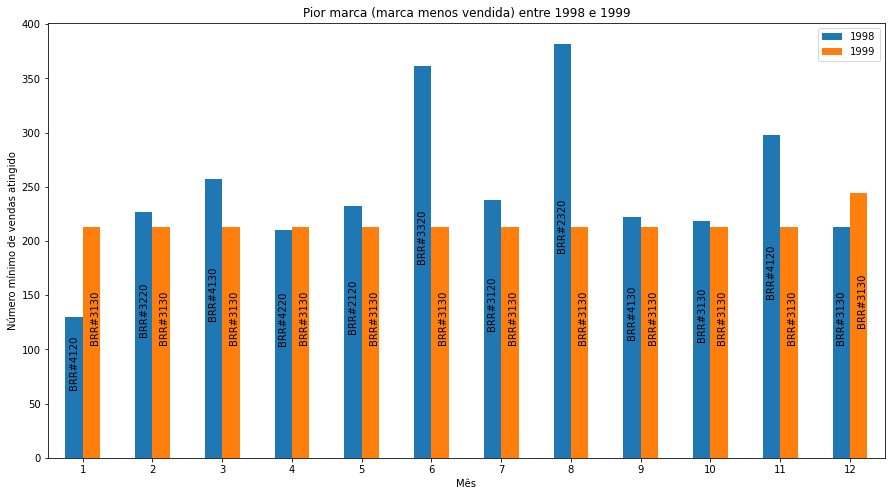

In [57]:
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = meses)
plotdata.plot(kind="bar",figsize=(15,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Pior marca (marca menos vendida) entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número mínimo de vendas atingido")

x=0
for i in top_brands98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_brands98[x],rotation=90)
    x = x + 1

x=0   
for i in top_brands99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_brands99[x],rotation=90)  
    x = x + 1

   
plotdata.describe()

## 17 - Pior marca (marca menos vendida por estação)

In [58]:
sales_total_price_p_brand_sellingseason98 = dataframe98[['sellingseason','p_brand','l_quantity']].groupby(['sellingseason','p_brand'])
sales_total_price_p_brand_sellingseason99 = dataframe99[['sellingseason','p_brand','l_quantity']].groupby(['sellingseason','p_brand'])

In [59]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_brand = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_brands98 = []
top_brands99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_brand']:
    if (i not in p_brand):
        p_brand.append(i)  
        
for i in sales_total_price_p_brand_sellingseason98:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_price_p_brand_sellingseason99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_brand.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_brand[index]]) #soma de todos os produtos vendidos por mês
 


x = 0
for i in total_sales_98:
    if(x == 64):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 64):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    
    
for i in results98:

    i.sort(key=lambda x:x[0])
    top1_sales98.append(i[0][0])
    top_brands98.append(i[0][1])
    
for i in results99:
    i.sort(key=lambda x:x[0])
    top1_sales99.append(i[0][0])
    top_brands99.append(i[0][1])            
            
'''
print(top_brands98)
print(len(top_brands98))
print(top1_sales98)
print(len(top1_sales98))
print()
print()
print(top_brands99)
print(len(top_brands99))
print(top1_sales99)
print(len(top1_sales99))
'''

'\nprint(top_brands98)\nprint(len(top_brands98))\nprint(top1_sales98)\nprint(len(top1_sales98))\nprint()\nprint()\nprint(top_brands99)\nprint(len(top_brands99))\nprint(top1_sales99)\nprint(len(top1_sales99))\n'

,1998,1999
count,5.000000,5.000000
mean,831.400000,819.400000
std,552.771924,70.659748
min,210.000000,693.000000
25%,598.000000,851.000000
50%,784.000000,851.000000
75%,851.000000,851.000000
max,1714.000000,851.000000


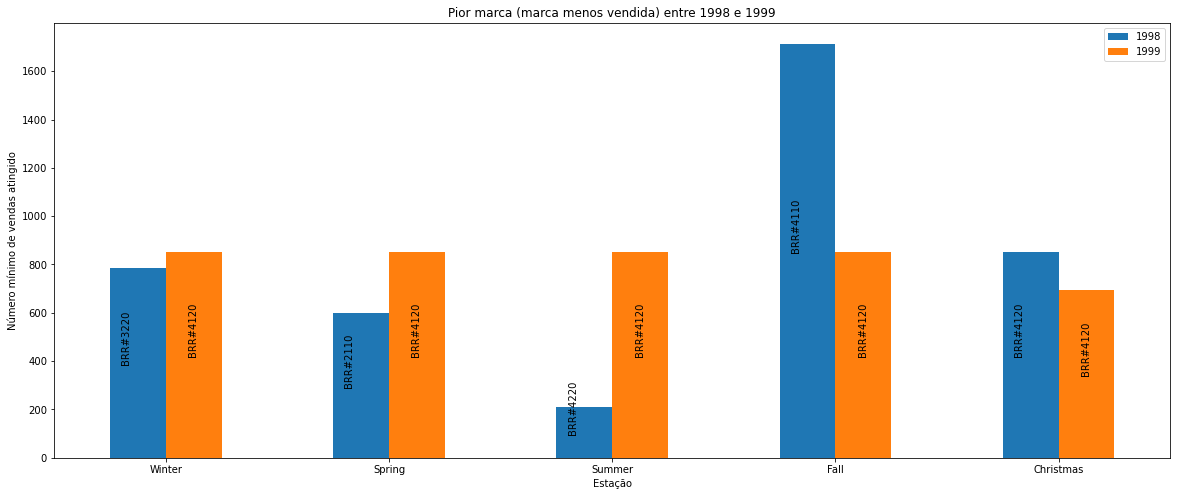

In [60]:
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = seasons)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Pior marca (marca menos vendida) entre 1998 e 1999")
plt.xlabel("Estação")
plt.ylabel("Número mínimo de vendas atingido")
x=0
for i in top_brands98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_brands98[x],rotation=90)
    x = x + 1

x=0   
for i in top_brands99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_brands99[x],rotation=90)  
    x = x + 1
   
plotdata.describe()

## 18 - Pior categoria (categoria menos vendida por mês)

In [61]:
sales_total_sales_p_category_month98 = dataframe98[['month','p_category','l_quantity']].groupby(['month','p_category'])
sales_total_sales_p_category_month99 = dataframe99[['month','p_category','l_quantity']].groupby(['month','p_category'])

In [62]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_category = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_categories98 = []
top_categories99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_category']:
    if (i not in p_category):
        p_category.append(i)  
        
for i in sales_total_sales_p_category_month98:
    #print(i[1])
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_sales_p_category_month99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 



x = 0
for i in total_sales_98:
    if(x == 16):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 16):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0])
    top1_sales98.append(i[0][0])
    top_categories98.append(i[0][1])

a = 0
for i in results99:
    i.sort(key=lambda x:x[0])
    top1_sales99.append(i[0][0])
    top_categories99.append(i[0][1])
    a = a + 1

,1998,1999
count,12.000000,12.000000
mean,1653.166667,1550.000000
std,419.848854,45.033321
min,1134.000000,1537.000000
25%,1376.250000,1537.000000
50%,1552.000000,1537.000000
75%,1920.000000,1537.000000
max,2498.000000,1693.000000


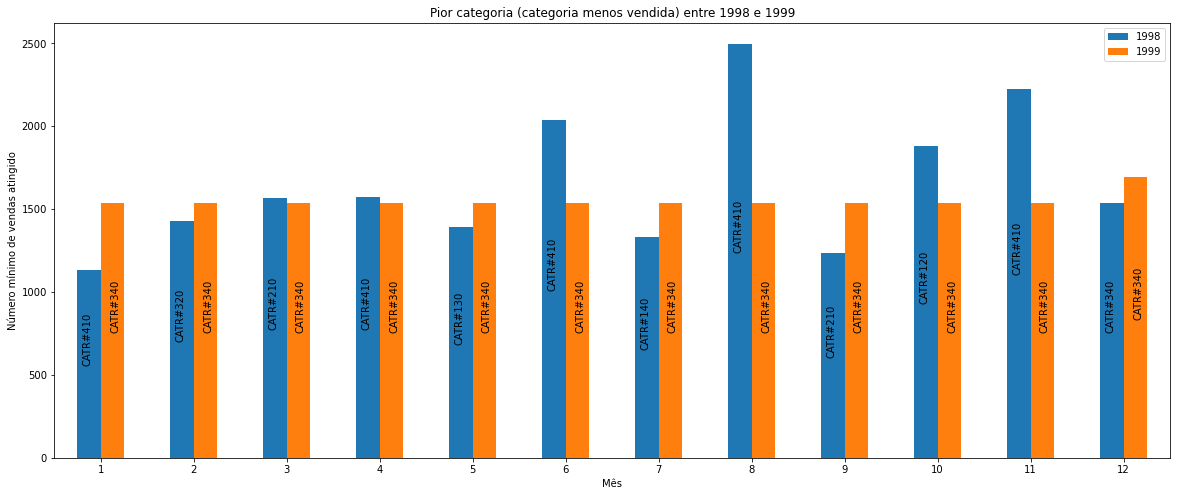

In [63]:
meses.sort()
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = meses)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Pior categoria (categoria menos vendida) entre 1998 e 1999")
plt.xlabel("Mês")
plt.ylabel("Número mínimo de vendas atingido")

x=0
for i in top_categories98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_categories98[x],rotation=90)
    x = x + 1

x=0   
for i in top_categories99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_categories99[x],rotation=90)  
    x = x + 1
   
plotdata.describe()

## 19 - Pior categoria (categoria menos vendida por estação)

In [64]:
sales_total_sales_p_category_sellingseason98 = dataframe98[['sellingseason','p_category','l_quantity']].groupby(['sellingseason','p_category'])
sales_total_sales_p_category_sellingseason99 = dataframe99[['sellingseason','p_category','l_quantity']].groupby(['sellingseason','p_category'])

In [65]:
total_sales_98 = []
total_sales_99 = []
top_1_produtos_best_sales98 = []
top_1_produtos_best_sales99 = []
p_category = []
results98 = []
results99 = []
res_aux98 = []
res_aux99 = []
top_categories98 = []
top_categories99 = []
top1_sales98 = []
top1_sales99 = []
for i in dataframe98['p_category']:
    if (i not in p_category):
        p_category.append(i)  
        
for i in sales_total_sales_p_category_sellingseason98:
    #print(i[1])
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_98.append([i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 

for i in sales_total_sales_p_category_sellingseason99:
    #print(i[1].p_brand.index[0]) 
    index = i[1].p_category.index[0]
    total_sales_99.append([ i[1].l_quantity.sum(), i[1].p_category[index]]) #soma de todos os produtos vendidos por mês
 



x = 0
for i in total_sales_98:
    if(x == 16):
        x=0
        results98.append(res_aux98)
        res_aux98 = []
        res_aux98.append([i[0],i[1]])
        x = x+1
    else:
        res_aux98.append([i[0],i[1]])
        x = x+1
results98.append(res_aux98)


x = 0
for i in total_sales_99:
    if(x == 16):
        x=0
        results99.append(res_aux98)
        res_aux99 = []
        res_aux99.append([i[0],i[1]])
        x = x+1
    else:
        res_aux99.append([i[0],i[1]])
        x = x+1
results99.append(res_aux99) 
    


    
for i in results98:
    i.sort(key=lambda x:x[0])
    top1_sales98.append(i[0][0])
    top_categories98.append(i[0][1])

a = 0
for i in results99:
    i.sort(key=lambda x:x[0])
    top1_sales99.append(i[0][0])
    top_categories99.append(i[0][1])
    a = a + 1

,1998,1999
count,5.00000,5.000000
mean,4317.40000,4455.000000
std,2319.99931,49.193496
min,1570.00000,4367.000000
25%,3534.00000,4477.000000
50%,4046.00000,4477.000000
75%,4477.00000,4477.000000
max,7960.00000,4477.000000


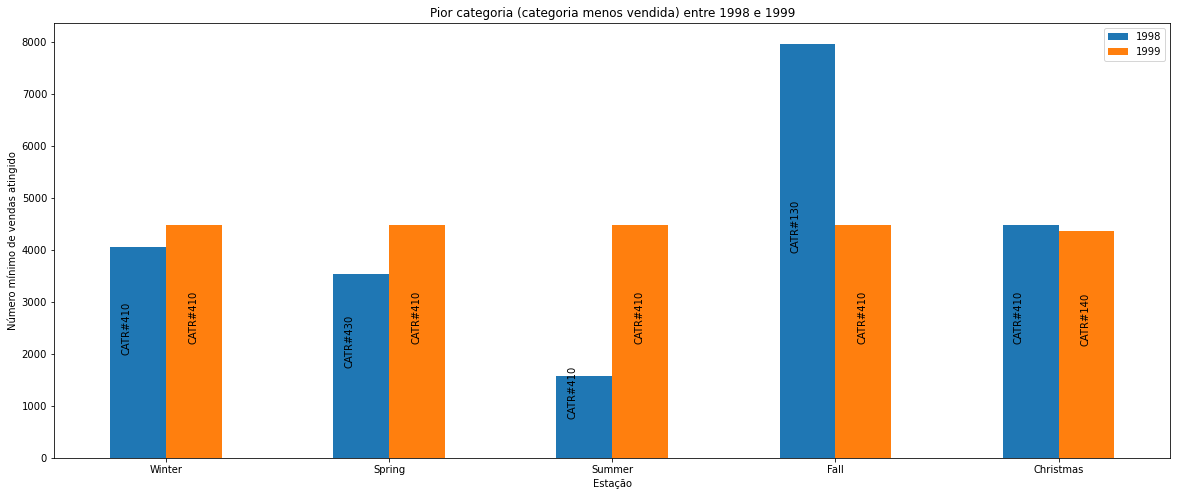

In [66]:
meses.sort()
plotdata = pd.DataFrame({"1998": top1_sales98, "1999": top1_sales99}, index = seasons)
plotdata.plot(kind="bar",figsize=(20,8))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Pior categoria (categoria menos vendida) entre 1998 e 1999")
plt.xlabel("Estação")
plt.ylabel("Número mínimo de vendas atingido")

x=0
for i in top_categories98: 
    plt.text(x - 0.2 , top1_sales98[x]/2 , top_categories98[x],rotation=90)
    x = x + 1

x=0   
for i in top_categories99: 
    plt.text(x + 0.1 , top1_sales99[x]/2 , top_categories99[x],rotation=90)  
    x = x + 1
   
plotdata.describe()

## 20 - Variação do número de encomendas realizadas por país

In [67]:
orders_c_region98 = dataframe98[['c_nation','id']].groupby(['c_nation'])
orders_c_region99 = dataframe99[['c_nation','id']].groupby(['c_nation'])

In [68]:
c_nations = []
orders_98 = []
orders_99 = []
res = []
for i in orders_c_region98:
    orders_98.append(i[1].id.count())

for i in orders_c_region99:
    orders_99.append(i[1].id.count())
            
for i in dataframe98['c_nation']:
    if (i not in c_nations):
        c_nations.append(i)  
        
i=0
while(i < len(orders_98)):
    newValue = []
    newValue.append(orders_98[i])
    newValue.append(orders_99[i])
    res.append(newValue)
    i=i+1

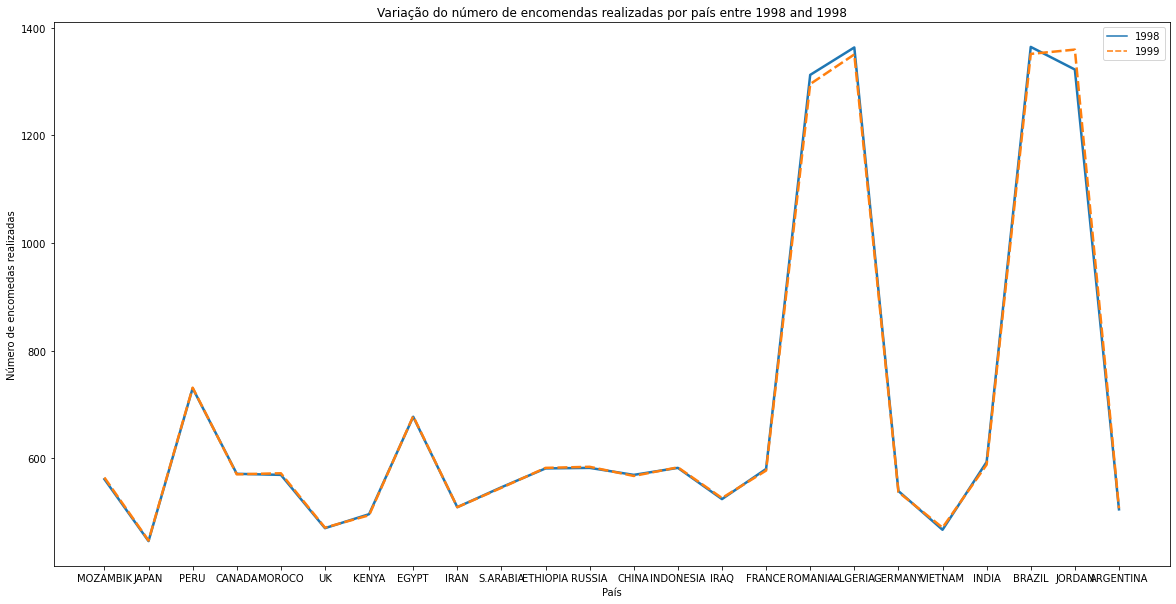

,1998,1999
count,24.000000,24.000000
mean,685.750000,685.750000
std,305.388598,304.696321
min,446.000000,447.000000
25%,520.250000,521.750000
50%,570.000000,571.000000
75%,614.000000,610.500000
max,1364.000000,1359.000000


In [69]:
data = pd.DataFrame(res, c_nations, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 10))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="País", ylabel='Número de encomedas realizadas')
lineplot.set_title('Variação do número de encomendas realizadas por país entre 1998 and 1998')
plt.show() 
data.describe()

## 21 - Variação do número de encomendas realizadas por mês

In [70]:
orders_c_region98 = dataframe98[['month','id']].groupby(['month'])
orders_c_region99 = dataframe99[['month','id']].groupby(['month'])

In [71]:
orders_98 = []
orders_99 = []
res = []
for i in orders_c_region98:
    orders_98.append(i[1].id.count())

for i in orders_c_region99:
    orders_99.append(i[1].id.count())
 
        
i=0
while(i < len(orders_98)):
    newValue = []
    newValue.append(orders_98[i])
    newValue.append(orders_99[i])
    res.append(newValue)
    i=i+1

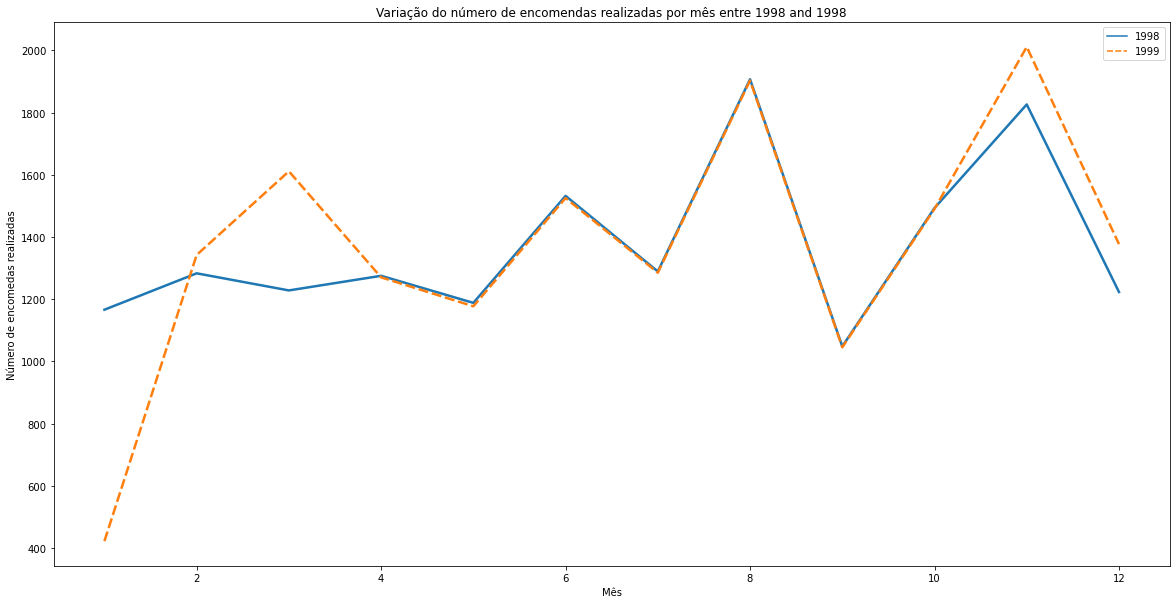

,1998,1999
count,12.000000,12.000000
mean,1371.500000,1371.500000
std,266.458764,410.220007
min,1048.000000,422.000000
25%,1214.250000,1246.750000
50%,1279.000000,1359.500000
75%,1502.750000,1546.500000
max,1907.000000,2011.000000


In [72]:
meses.sort()
data = pd.DataFrame(res, meses, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 10))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Mês", ylabel='Número de encomedas realizadas')
lineplot.set_title('Variação do número de encomendas realizadas por mês entre 1998 and 1998')
plt.show() 
data.describe()

## 22 - Variação do número de produtos comprados por país

In [73]:
sales_c_nation98 = dataframe98[['c_nation','l_quantity']].groupby(['c_nation'])
sales_c_nation99 = dataframe99[['c_nation','l_quantity']].groupby(['c_nation'])

In [74]:
orders_98 = []
orders_99 = []
res = []
for i in sales_c_nation98:
    orders_98.append(i[1].l_quantity.sum())

for i in sales_c_nation99:
    orders_99.append(i[1].l_quantity.sum())
 
        
i=0
while(i < len(orders_98)):
    newValue = []
    newValue.append(orders_98[i])
    newValue.append(orders_99[i])
    res.append(newValue)
    i=i+1
    
print(res)

[[13751.0, 13797.0], [10796.0, 10806.0], [19000.0, 19018.0], [13591.0, 13577.0], [14510.0, 14605.0], [11339.0, 11350.0], [12529.0, 12475.0], [17029.0, 17034.0], [12656.0, 12656.0], [13661.0, 13632.0], [14813.0, 14821.0], [15044.0, 15110.0], [13724.0, 13691.0], [14781.0, 14826.0], [12883.0, 12918.0], [14603.0, 14550.0], [32587.0, 32147.0], [34128.0, 33784.0], [13522.0, 13418.0], [11270.0, 11381.0], [14941.0, 14764.0], [33001.0, 32691.0], [33283.0, 34379.0], [12676.0, 12688.0]]


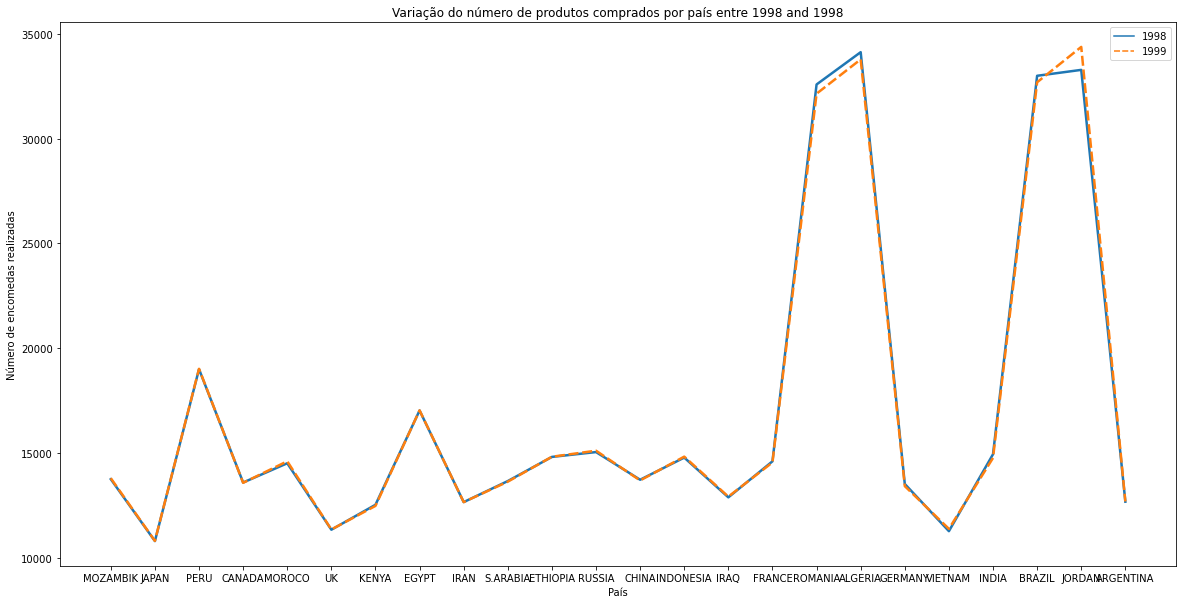

,1998,1999
count,24.000000,24.000000
mean,17088.250000,17088.250000
std,7590.194385,7594.636793
min,10796.000000,10806.000000
25%,12831.250000,12860.500000
50%,14130.500000,14173.500000
75%,15540.250000,15591.000000
max,34128.000000,34379.000000


In [75]:
meses.sort()
data = pd.DataFrame(res, c_nations, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 10))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="País", ylabel='Número de encomedas realizadas')
lineplot.set_title('Variação do número de produtos comprados por país entre 1998 and 1998')
plt.show() 
data.describe()

## 23 - Variação do número de produtos comprados por mês

In [76]:
sales_c_nation98 = dataframe98[['month','l_quantity']].groupby(['month'])
sales_c_nation99 = dataframe99[['month','l_quantity']].groupby(['month'])

In [77]:
orders_98 = []
orders_99 = []
res = []
for i in sales_c_nation98:
    orders_98.append(i[1].l_quantity.sum())

for i in sales_c_nation99:
    orders_99.append(i[1].l_quantity.sum())
 
        
i=0
while(i < len(orders_98)):
    newValue = []
    newValue.append(orders_98[i])
    newValue.append(orders_99[i])
    res.append(newValue)
    i=i+1
    
print(res)

[[29582.0, 10606.0], [31059.0, 32879.0], [30336.0, 39783.0], [31563.0, 31371.0], [29630.0, 29360.0], [38741.0, 38559.0], [32602.0, 32562.0], [47265.0, 47167.0], [26088.0, 26044.0], [37223.0, 37197.0], [45852.0, 50619.0], [30177.0, 33971.0]]


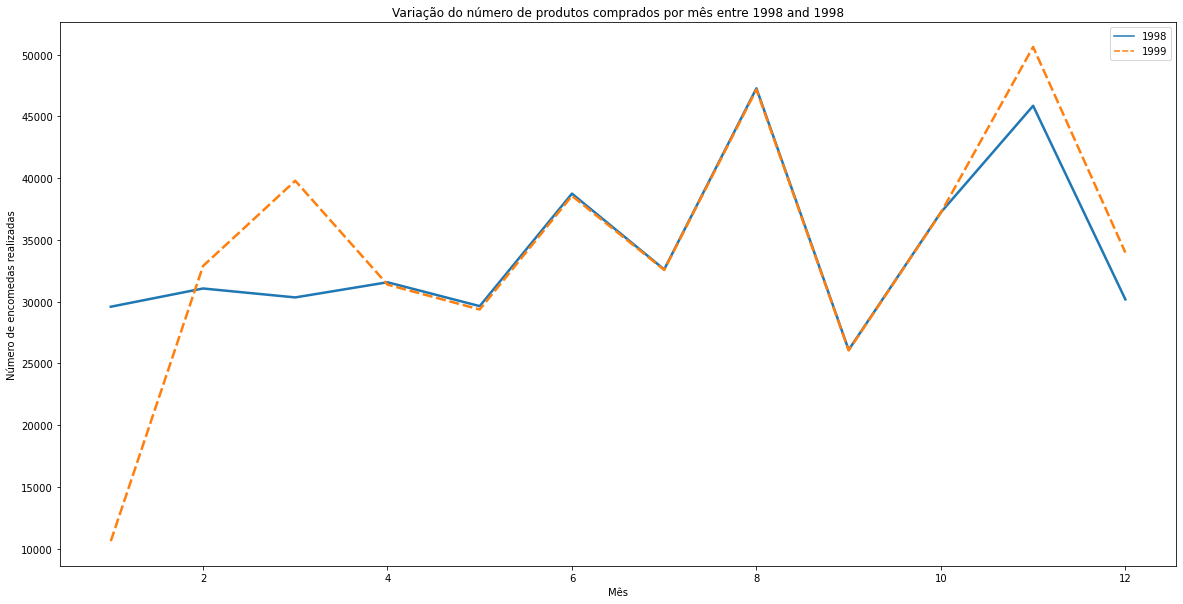

,1998,1999
count,12.000000,12.000000
mean,34176.500000,34176.500000
std,6706.303405,10251.294113
min,26088.000000,10606.000000
25%,30040.250000,30868.250000
50%,31311.000000,33425.000000
75%,37602.500000,38865.000000
max,47265.000000,50619.000000


In [78]:
meses.sort()
data = pd.DataFrame(res, meses, columns=["1998", "1999"])
fig, ax = plt.subplots(figsize= (20, 10))
lineplot = sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)
lineplot.set(xlabel ="Mês", ylabel='Número de encomedas realizadas')
lineplot.set_title('Variação do número de produtos comprados por mês entre 1998 and 1998')
plt.show() 
data.describe()

## 24 - Clustering

In [79]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn import preprocessing

In [80]:
dataframe.loc[dataframe["sellingseason"] =="Spring", 'sellingseason'] = 1
dataframe.loc[dataframe["sellingseason"] =="Summer", 'sellingseason'] = 2
dataframe.loc[dataframe["sellingseason"] =="Fall", 'sellingseason'] = 3
dataframe.loc[dataframe["sellingseason"] =="Winter", 'sellingseason'] = 4
dataframe.loc[dataframe["sellingseason"] =="Christmas", 'sellingseason'] = 5

dataframe.loc[dataframe["p_category"] =="CATR#310", 'p_category'] = 310
dataframe.loc[dataframe["p_category"] =="CATR#220", 'p_category'] = 220
dataframe.loc[dataframe["p_category"] =="CATR#130", 'p_category'] = 130
dataframe.loc[dataframe["p_category"] =="CATR#330", 'p_category'] = 330
dataframe.loc[dataframe["p_category"] =="CATR#230", 'p_category'] = 230
dataframe.loc[dataframe["p_category"] =="CATR#140", 'p_category'] = 140
dataframe.loc[dataframe["p_category"] =="CATR#430", 'p_category'] = 430
dataframe.loc[dataframe["p_category"] =="CATR#210", 'p_category'] = 210
dataframe.loc[dataframe["p_category"] =="CATR#440", 'p_category'] = 440
dataframe.loc[dataframe["p_category"] =="CATR#420", 'p_category'] = 420
dataframe.loc[dataframe["p_category"] =="CATR#410", 'p_category'] = 410
dataframe.loc[dataframe["p_category"] =="CATR#120", 'p_category'] = 120
dataframe.loc[dataframe["p_category"] =="CATR#110", 'p_category'] = 110
dataframe.loc[dataframe["p_category"] =="CATR#320", 'p_category'] = 320
dataframe.loc[dataframe["p_category"] =="CATR#240", 'p_category'] = 240
dataframe.loc[dataframe["p_category"] =="CATR#340", 'p_category'] = 340

dataframe['p_category'] = dataframe['p_category'].astype(float)

df = dataframe[['sellingseason','month','l_quantity','monthnuminyear','l_ordertotalprice','l_extendedprice','year','p_category']].groupby(['monthnuminyear','sellingseason','year','p_category'])
df = df.aggregate(np.sum)

df

l_quantity  l_ordertotalprice  \
monthnuminyear sellingseason year p_category                                  
1              4             1998 110.0           1996.0       1.159860e+09   
                                  120.0           1745.0       9.223668e+08   
                                  130.0           1634.0       9.140105e+08   
                                  140.0           1697.0       9.788110e+08   
                                  210.0           1771.0       1.198601e+09   
...                                                  ...                ...   
12             5             1999 340.0           1693.0       1.220322e+09   
                                  410.0           2219.0       1.364435e+09   
                                  420.0           2077.0       1.055891e+09   
                                  430.0           2537.0       1.523161e+09   
                                  440.0           2259.0       1.103985e+09   

                                              l_extendedprice  
monthnuminyear sellingseason year p_category                   
1              4             1998 110.0           286854387.0  
                                  120.0           242814611.0  
                                  130.0           239008829.0  
                                  140.0           243766587.0  
                                  210.0           256520757.0  
...                                                       ...  
12             5             1999 340.0           251288496.0  
                                  410.0           304530017.0  
                                  420.0           294737325.0  
                                  430.0           358471779.0  
                                  440.0           312430436.0  

[384 rows x 3 columns]

In [81]:
df['l_extendedprice'] = df['l_extendedprice'].astype(float)
df['l_ordertotalprice'] = df['l_ordertotalprice'].astype(float)
df['l_quantity'] = df['l_quantity'].astype(float)
df

l_quantity  l_ordertotalprice  \
monthnuminyear sellingseason year p_category                                  
1              4             1998 110.0           1996.0       1.159860e+09   
                                  120.0           1745.0       9.223668e+08   
                                  130.0           1634.0       9.140105e+08   
                                  140.0           1697.0       9.788110e+08   
                                  210.0           1771.0       1.198601e+09   
...                                                  ...                ...   
12             5             1999 340.0           1693.0       1.220322e+09   
                                  410.0           2219.0       1.364435e+09   
                                  420.0           2077.0       1.055891e+09   
                                  430.0           2537.0       1.523161e+09   
                                  440.0           2259.0       1.103985e+09   

                                              l_extendedprice  
monthnuminyear sellingseason year p_category                   
1              4             1998 110.0           286854387.0  
                                  120.0           242814611.0  
                                  130.0           239008829.0  
                                  140.0           243766587.0  
                                  210.0           256520757.0  
...                                                       ...  
12             5             1999 340.0           251288496.0  
                                  410.0           304530017.0  
                                  420.0           294737325.0  
                                  430.0           358471779.0  
                                  440.0           312430436.0  

[384 rows x 3 columns]

In [82]:
K = range(1,11)
# scipy.cluster.vq.kmeans
KM=[kmeans(df.values, k) for k in K ]
KM[:3]

[(array([[2.13603125e+03, 1.25645134e+09, 3.02274687e+08]]),
  273619924.76286787),
 (array([[2.72588406e+03, 1.61659094e+09, 3.85167969e+08],
         [1.80513821e+03, 1.05442181e+09, 2.55773577e+08]]),
  177886519.78920487),
 (array([[2.24542945e+03, 1.31685614e+09, 3.17011283e+08],
         [1.62843791e+03, 9.45224644e+08, 2.30845989e+08],
         [3.01588235e+03, 1.81191757e+09, 4.27664767e+08]]),
  131822935.36159074)]

In [83]:
euclidean_centroid = [cdist(df.values, centroid, 'euclidean') for (centroid,var) in KM]
print ('-----with 1 cluster------')
print (euclidean_centroid[0][:5])
print()
print ('-----with 2 cluster------')
print (euclidean_centroid[1][:5])

-----with 1 cluster------
[[9.78147633e+07]
 [3.39334654e+08]
 [3.48236005e+08]
 [2.83738169e+08]
 [7.37566997e+07]]

-----with 2 cluster------
[[4.67192649e+08 1.09923466e+08]
 [7.08668955e+08 1.32689378e+08]
 [7.17622325e+08 1.41408627e+08]
 [6.53266854e+08 7.65582147e+07]
 [4.37339060e+08 1.44181413e+08]]


In [84]:
dist = [np.min(D,axis=1) for D in euclidean_centroid]
print ('-----with 1st cluster------')
print (dist[0][:5])
print ('-----with 2nd cluster------')
print (dist[1][:5])

-----with 1st cluster------
[9.78147633e+07 3.39334654e+08 3.48236005e+08 2.83738169e+08
 7.37566997e+07]
-----with 2nd cluster------
[1.09923466e+08 1.32689378e+08 1.41408627e+08 7.65582147e+07
 1.44181413e+08]


In [85]:
avgWithinSS = [sum(d)/df.values.shape[0] for d in dist]
avgWithinSS

[273619924.762868,
 178134387.03284386,
 133313737.17905307,
 102712365.4997104,
 80576891.13717268,
 69193122.8037922,
 57533618.101494215,
 51791094.1569064,
 47056501.64573753,
 43871797.67686834]

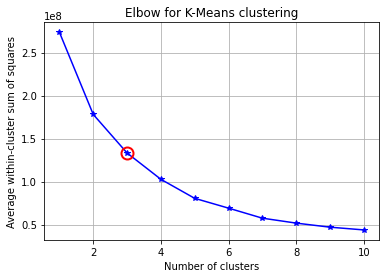

In [86]:
#Choosing the cluster number
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')
plt.show()

In [87]:
km = KMeans(3, init='k-means++',random_state=1426) # initialize
km.fit(df.values)
df['clusteringGroups'] = km.predict(df.values)
df[:100]


l_quantity  l_ordertotalprice  \
monthnuminyear sellingseason year p_category                                  
1              4             1998 110.0           1996.0       1.159860e+09   
                                  120.0           1745.0       9.223668e+08   
                                  130.0           1634.0       9.140105e+08   
                                  140.0           1697.0       9.788110e+08   
                                  210.0           1771.0       1.198601e+09   
...                                                  ...                ...   
3              4             1999 440.0           2262.0       1.324508e+09   
4              1             1998 110.0           1947.0       1.175677e+09   
                                  120.0           2033.0       1.110651e+09   
                                  130.0           1647.0       1.010529e+09   
                                  140.0           2139.0       1.171600e+09   

                                              l_extendedprice  \
monthnuminyear sellingseason year p_category                    
1              4             1998 110.0           286854387.0   
                                  120.0           242814611.0   
                                  130.0           239008829.0   
                                  140.0           243766587.0   
                                  210.0           256520757.0   
...                                                       ...   
3              4             1999 440.0           326919467.0   
4              1             1998 110.0           270604773.0   
                                  120.0           306772785.0   
                                  130.0           227151155.0   
                                  140.0           304295601.0   

                                              clusteringGroups  
monthnuminyear sellingseason year p_category                    
1              4             1998 110.0                      2  
                                  120.0                      0  
                                  130.0                      0  
                                  140.0                      0  
                                  210.0                      2  
...                                                        ...  
3              4             1999 440.0                      2  
4              1             1998 110.0                      2  
                                  120.0                      2  
                                  130.0                      0  
                                  140.0                      2  

[100 rows x 4 columns]

In [88]:
df.groupby('clusteringGroups').l_quantity.sum()

clusteringGroups
0     99011.0
1    240500.0
2    480725.0
Name: l_quantity, dtype: float64

In [89]:
clust_map = {
       0:'Pouco Procurado',
       1:"Procurado",
       2:'Muito Procurado'
   }
df.clusteringGroups = df.clusteringGroups.map(clust_map)
df.shape

(384, 4)

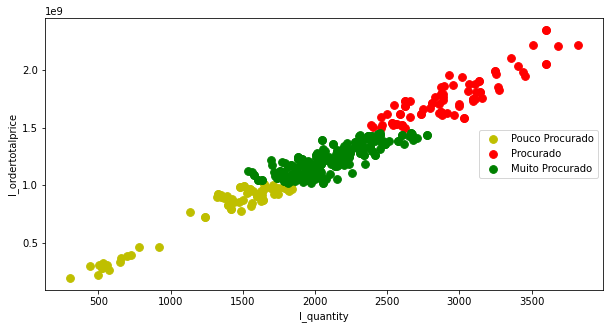

In [90]:
d_color = {
       'Pouco Procurado':'y',
       'Procurado':'r',
       'Muito Procurado':'g'
   }
fig, ax = plt.subplots(figsize= (10, 5))
for clust in clust_map.values():
       color = d_color[clust]
       df[df.clusteringGroups == clust].plot(kind='scatter',
            x='l_quantity', y='l_ordertotalprice', label=clust,
            ax=ax, color=color, s=60)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="right")
plt.show()

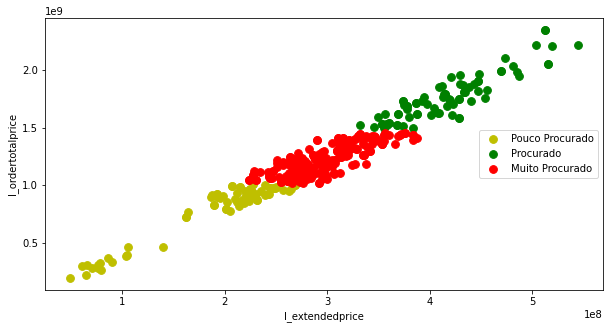

In [91]:
d_color = {
       'Pouco Procurado':'y',
       'Muito Procurado':'r',
       'Procurado':'g'
   }
fig, ax = plt.subplots(figsize= (10, 5))
for clust in clust_map.values():
       color = d_color[clust]
       df[df.clusteringGroups == clust].plot(kind='scatter',
            x='l_extendedprice', y='l_ordertotalprice', label=clust,
            ax=ax, color=color, s=60)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="right")
plt.show()

## 25 - Regressão

In [92]:
from  sklearn import linear_model

In [93]:
df = dataframe[['l_quantity','monthnuminyear','l_ordertotalprice','l_extendedprice','month',]].groupby(['month'])
df = df['l_ordertotalprice','l_quantity'].aggregate(np.sum)

df

<ipython-input-93-e9db24aec52b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df['l_ordertotalprice','l_quantity'].aggregate(np.sum)


,l_ordertotalprice,l_quantity
month,,
1,2.260307e+10,40188.0
2,3.708373e+10,63938.0
3,4.141535e+10,70119.0
4,3.679073e+10,62934.0
5,3.279892e+10,58990.0
6,4.367831e+10,77300.0
7,3.871087e+10,65164.0
8,5.721136e+10,94432.0
9,3.186096e+10,52132.0


In [94]:
reg=linear_model.LinearRegression()
reg.fit(df[['l_quantity']],df.l_ordertotalprice)

LinearRegression()

In [95]:
reg.predict([[50000]])

array([2.87990381e+10])

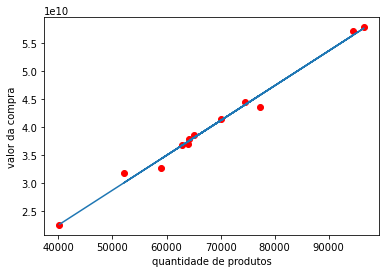

In [96]:
%matplotlib inline
plt.xlabel('quantidade de produtos')
plt.ylabel('valor da compra')
plt.scatter(df.l_quantity, df.l_ordertotalprice, color='red')
plt.plot(df.l_quantity,reg.predict(df[['l_quantity']]))